# EDA

The first most important step in data analysis is to perform a exploratory data analysis (EDA). EDA involves inspecting for null and duplicate values, data preprocessing, assessing distribution of each variable and identifying simple trends between variables. Depending on the complexity of the datasets, data scientists can spend between 50%-90% of the time performing EDA, to ensure that the data is properly processed for further in-depth analysis.

EDA is useful is when deciding on the appropriate statistics to use. Importantly, the statistical tests used for variables with Gaussian distribution will be different from another dataset where the distribution may be skewed. 

Finally, the strength of correlation between different variables can provide insights for machine learning, where features with poor correlation or almost prefect correlation can be removed from further analysis. 

Overall, EDA provides critical insights into the general structure and characteristics of the dataset, which will be useful for further downstream analysis and machine learning.

### An EDA checklist
If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset.

#### An EDA checklist
1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 



In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
1466,1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
1467,1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
1468,1469,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.head() #first 5 rows

,Index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.head(20) 

,Index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
5,6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,...,3,80,0,8,2,2,7,7,3,6
6,7,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,...,1,80,3,12,3,2,1,0,0,0
7,8,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,...,2,80,1,1,2,3,1,0,0,0
8,9,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,...,2,80,0,10,2,3,9,7,1,8
9,10,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,...,2,80,2,17,3,2,7,7,7,7


In [5]:
df.tail() #last 5 rows

,Index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
1466,1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
1467,1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
1468,1469,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8
1469,1470,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,...,1,80,0,6,3,4,4,3,1,2


In [6]:
#last 10 row
df.tail(10)

,Index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,1461,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,...,2,80,0,5,3,1,5,4,0,4
1461,1462,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,...,2,80,1,20,3,3,3,2,2,0
1462,1463,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,...,1,80,1,21,2,2,20,9,9,6
1463,1464,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,...,2,80,0,10,2,3,9,4,1,7
1464,1465,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,...,4,80,0,5,2,3,4,2,0,0
1465,1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
1466,1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
1467,1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
1468,1469,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8
1469,1470,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,...,1,80,0,6,3,4,4,3,1,2


In [7]:
df.index #checking the index

RangeIndex(start=0, stop=1470, step=1)

In [8]:
df_obj = df.select_dtypes(['object'])
df_obj

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


## General description

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Index                     1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [10]:
df.shape

(1470, 36)

In [11]:
df.describe() #numercial 

,Index,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
df.describe(include=['object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [13]:
df.describe(include=['bool','object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [14]:
df.columns

Index(['Index', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [15]:
df.columns.str.strip()
#The str.strip() function is used to remove leading and trailing characters.
#Strip whitespaces (including newlines)

Index(['Index', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [16]:
s = pd.Series(['1. Bat.  ', '2. Dog!\n', '3. fox?\t', np.nan])
s
#a set of specified characters from each string in the Series/Index from left and right sides.

0    1. Bat.  
1    2. Dog!\n
2    3. fox?\t
3          NaN
dtype: object

In [17]:
s.str.strip('123.!? \n\t')

0    Bat
1    Dog
2    fox
3    NaN
dtype: object

In [18]:
s = pd.Series(['1. Bat cy', '2. Dog cy', '3. fox cy',np.nan])
s1=s.str.replace("cy","")
s1

0    1. Bat 
1    2. Dog 
2    3. fox 
3        NaN
dtype: object

### What kind of data do you have and how to treat different types?
Let’s separate the features (columns) out into three boxes, numerical, categorical and not sure.


In [19]:
df.dtypes

Index                        int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel    

In [20]:
df_obj = df.select_dtypes(['object'])
df_obj

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


age 
percentile( 4 =100/4) 0 25 50 75 100% 
(5, 100/5) 0 20 40 60 80 100

customised bin
0-10 10-25 25-40 40-80 80-90 90-100% 



In [21]:
for column in df:
    print("Column"," ",column,"  uniquevalus  are :", df[column].nunique())
    print(df[column].unique())
    print("-------------------------")

Column   Index   uniquevalus  are : 1470
[   1    2    3 ... 1468 1469 1470]
-------------------------
Column   Age   uniquevalus  are : 43
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
-------------------------
Column   Attrition   uniquevalus  are : 2
['Yes' 'No']
-------------------------
Column   BusinessTravel   uniquevalus  are : 3
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
-------------------------
Column   DailyRate   uniquevalus  are : 886
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  

In [22]:
for column in df:
    print("Column"," ",column," value counts is :", df[column].info())
    print("-------------------------------------------------------")


<class 'pandas.core.series.Series'>
RangeIndex: 1470 entries, 0 to 1469
Series name: Index
Non-Null Count  Dtype
--------------  -----
1470 non-null   int64
dtypes: int64(1)
memory usage: 11.6 KB
Column   Index  value counts is : None
-------------------------------------------------------
<class 'pandas.core.series.Series'>
RangeIndex: 1470 entries, 0 to 1469
Series name: Age
Non-Null Count  Dtype
--------------  -----
1470 non-null   int64
dtypes: int64(1)
memory usage: 11.6 KB
Column   Age  value counts is : None
-------------------------------------------------------
<class 'pandas.core.series.Series'>
RangeIndex: 1470 entries, 0 to 1469
Series name: Attrition
Non-Null Count  Dtype 
--------------  ----- 
1470 non-null   object
dtypes: object(1)
memory usage: 11.6+ KB
Column   Attrition  value counts is : None
-------------------------------------------------------
<class 'pandas.core.series.Series'>
RangeIndex: 1470 entries, 0 to 1469
Series name: BusinessTravel
Non-Null Count  Dt

In [23]:
df['WorkLifeBalance'].value_counts()

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

In [24]:
for column in df:
    print("Column"," ",column," value counts is :", df[column].value_counts())
    print("-------------------------------------------------------")

Column   Index  value counts is : Index
1       1
988     1
986     1
985     1
984     1
       ..
489     1
488     1
487     1
486     1
1470    1
Name: count, Length: 1470, dtype: int64
-------------------------------------------------------
Column   Age  value counts is : Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64
-------------------------------------------------------
Column   Attrition  value counts is : Attrition
No     1233
Yes     237
Name: count, dtype: int64
-------------------------------------------------------
Column   BusinessTravel  value counts is : BusinessTravel
Travel_Rarely        1043
Travel_Freq

## checking missing data

In [25]:
df['Attrition'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Name: Attrition, Length: 1470, dtype: bool

In [26]:
df.isna().sum()

Index                       0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

In [27]:
df1copy.isnull()

NameError: name 'df1copy' is not defined

In [ ]:
df1copy.isnull().sum()

In [ ]:
df1copy.info()

In [ ]:
for column in df:
    print( "column name:", column, "- misisng values ",df[column].isnull().sum())
    print("------------------------------------------------------------------")

In [ ]:
def data(data):
    print("-----------column----------")
    print(data.columns)
    print("----------info-----------")
    print(data.info())
    print("----------shape-----------")
    print(data.shape)
    print("----------duplicate-----------") 
    print(data.duplicated())
    print("----------column types-----------") 
    print(data.dtypes)
    print("----------missing values sum-----------") 
    print(data.isnull().sum())
    print("----------end-----------")  

In [ ]:
data(df)

##### Aggregate Statistics (Groupby)

In [ ]:
df[df['Attrition']=='Yes'] #how many rows had yes

In [ ]:
df.groupby(['WorkLifeBalance']).mean()

In [ ]:
df[[df['BusinessTravel']=='Travel_Frequently'] && [df['Attrition']=='Yes']]

In [ ]:
df

In [ ]:
df.groupby(['WorkLifeBalance']).mean()

In [ ]:

#groupby attrition and work life balance
gbwb=df.groupby(['WorkLifeBalance'])['HourlyRate'].mean()
gbwb

In [ ]:
df.groupby(['YearsInCurrentRole'])[['Age','HourlyRate']].mean()

In [ ]:

dfgf=pd.DataFrame(df.groupby(['JobRole']).agg({'Age':[np.mean,np.std],'HourlyRate':[np.mean,'count'],'Education':'nunique'}))
dfgf

In [ ]:
df['index_backwards'] = range(len(df), 0, -1)
df['index_backwards']

In [ ]:
df

In [ ]:
df.Age.min()

In [ ]:
df.Age.max()

In [ ]:
1 3 4 7 10 16 17 20 quatiles=4
1-3( 3)
4-7(4)
10-16(6)
17-20(3)

# qcut
qcut= The pandas documentation describes qcut as a “Quantile-based discretization function.” This basically means that qcut tries to divide up the underlying data into equal sized bins. The function defines the bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins.

he simplest use of qcut is to define the number of quantiles and let pandas figure out how to divide up the data. In the example below, we tell pandas to create 4 equal sized groupings of the data.

in each case, there are an equal number of observations in each bin. Pandas does the math behind the scenes to figure out how wide to make each bin.
One important item to keep in mind when using qcut is that the quantiles must all be less than 1. Here are some examples of distributions. In most cases it’s simpler to just define q as an integer:

terciles: q=[0, 1/3, 2/3, 1] or q=3
quintiles: q=[0, .2, .4, .6, .8, 1] or q=5
sextiles: q=[0, 1/6, 1/3, .5, 2/3, 5/6, 1] or q=6

One question you might have is, how do I know what ranges are used to identify the different bins? You can use retbins=True to return the bin labels. Here’s a handy snippet of code to build a quick reference table:

there is one more potential way that we can label our bins. Instead of the bin ranges or custom labels, we can return integers by passing labels=False

In [ ]:
df["Age"]

In [ ]:
#breakdown according to quantile
df['Agerange1']=pd.qcut(df["Age"],q=4)
print(df[['Age','Agerange1']])


In [ ]:
df['Agerange1'].unique()

In [ ]:
df['Agerange2']=pd.qcut(df["Age"],q=10,precision=4)
print(df['Agerange2'])
print(df[['Age','Agerange2']])


In [ ]:
df['Agerange2'].unique()

In [ ]:
df['Age'].value_counts()

In [ ]:
df['Agerange1'].value_counts()

In [ ]:
df['Agerange5']=pd.qcut(df["Age"],q=5,precision=0)
print(df['Agerange5'])

In [ ]:
df['Agerange5'].value_counts()

In [ ]:
#name of categories
#set yourself
bin_labels_5 = ['17-30', '30-36', '36-43', '43-60']
df['age ranges 3'] = pd.qcut(df["Age"],
                              q=[0, .25, .5, .75,1],
                              labels=bin_labels_5)
df.head()

In [ ]:
df[['Age','age ranges 3','Agerange1']]

In [ ]:
df[df['Age']>40]
#filtering

In [ ]:
df[(df['Age']>40) & (df['BusinessTravel']=='Travel_Rarely') | (df['DailyRate']>500)]

In [ ]:
df['age ranges 3'].value_counts()

### Duplicates handling 

In [ ]:
df.duplicated()

In [ ]:
# check for duplicate values in ProductID column
for column in df:
    duplicate_values = df[column].duplicated()
    print(duplicate_values)
    print("------------------------------------------------------")

In [ ]:
df.duplicated().sum()

### Removing Duplicate Values
Once you have identified the duplicate values in your DataFrame column, you may want to remove them to avoid any issues in your analysis. You can use the drop_duplicates() method to remove the duplicate rows from your DataFrame.

#### keep:‘first’ or ‘last’ or False (default: ‘first’). 

It is used to specify which instance of the repeated rows is to be identified as a unique row.

In [ ]:
# remove duplicate values in EmployeeNumber
df = df.drop_duplicates(subset=['EmployeeNumber'], keep='first')
df

# cut
The major distinction is that qcut will calculate the size of each bin in order to make sure the distribution of data in the bins is equal. In other words, all bins will have (roughly) the same number of observations but the bin range will vary.

On the other hand, cut is used to specifically define the bin edges. There is no guarantee about the distribution of items in each bin. In fact, you can define bins in such a way that no items are included in a bin or nearly all items are in a single bin.

In real world examples, bins may be defined by business rules. For a frequent flier program, 25,000 miles is the silver level and that does not vary based on year to year variation of the data. If we want to define the bin edges (25,000 - 50,000, etc) we would use cut . We can also use cut to define bins that are of constant size and let pandas figure out how to define those bin edges.

If you want equal distribution of the items in your bins, use qcut . If you want to define your own numeric bin ranges, then use cut .

The major distinction is that qcut will calculate the size of each bin in order to make sure the distribution of data in the bins is equal. In other words, all bins will have (roughly) the same number of observations but the bin range will vary.

On the other hand, cut is used to specifically define the bin edges. There is no guarantee about the distribution of items in each bin. In fact, you can define bins in such a way that no items are included in a bin or nearly all items are in a single bin.

In real world examples, bins may be defined by business rules. For a frequent flier program, 25,000 miles is the silver level and that does not vary based on year to year variation of the data. If we want to define the bin edges (25,000 - 50,000, etc) we would use cut . We can also use cut to define bins that are of constant size and let pandas figure out how to define those bin edges.

If you want equal distribution of the items in your bins, use qcut . If you want to define your own numeric bin ranges, then use cut .

1


One of the challenges with defining the bin ranges with cut is that it can be cumbersome to create the list of all the bin ranges. There are a couple of shortcuts we can use to compactly create the ranges we need.

First, we can use numpy.linspace to create an equally spaced range:

pd.cut(df['ext price'], bins=np.linspace(0, 200000, 9))

Numpy’s linspace is a simple function that provides an array of evenly spaced numbers over a user defined range. In this example, we want 9 evenly spaced cut points between 0 and 200,000. Astute readers may notice that we have 9 numbers but only 8 categories. If you map out the actual categories, it should make sense why we ended up with 8 categories between 0 and 200,000. In all instances, there is one less category than the number of cut points.

In [ ]:
print(df['MonthlyIncome'].max())
print(df['MonthlyIncome'].min())

In [ ]:
print(df['MonthlyIncome'].nunique())

In [ ]:
#1009-19999
#5 bins 0-4 4-8 8-12 12-15 15-20
cut_labels_4 = ['copper','silver', 'gold', 'platinum', 'diamond']
cut_bins = [1000, 4000, 6000, 12000,15000, 200000]
df['Income package '] = pd.cut(df['MonthlyIncome'], bins=cut_bins, labels=cut_labels_4)

In [ ]:
age 
 19 teens
20-30 young adults
30-40 adults
40-50 real age
50+ old age

In [ ]:
0 20 30 40 50 70
labels=['teens', 'young adults,' 'adults','real age','old age']
df['Age range'] = pd.cut(df['Age'], bins=cut_bins, labels=cut_labels_4)

In [ ]:
df[['MonthlyIncome','Income package ']]

In [ ]:
df['Income package '].value_counts()

In [ ]:
df['Income package '].dtypes

In [ ]:


plt.hist(df['Income package '])
plt.show() 

In [ ]:

plt.hist(df['MonthlyIncome'])
plt.show() 

In [ ]:
df[['Income package ','MonthlyIncome']]

In [ ]:
df[['MonthlyIncome','Income package ']][df['Income package ']=='platinum']

In [ ]:
midx = pd.MultiIndex(levels=[['llama', 'cow', 'falcon'],
                             ['speed', 'weight', 'length']],
                     codes=[[0, 0, 0, 1, 1, 1, 2, 2, 2],
                            [0, 1, 2, 0, 1, 2, 0, 1, 2]])
df2 = pd.DataFrame(index=midx, columns=['big', 'small'],
                  data=[[45, 30], [200, 100], [1.5, 1], [30, 20],
                        [250, 150], [1.5, 0.8], [320, 250],
                        [1, 0.8], [0.3, 0.2]])
df2

In [ ]:
df2.drop(index=('falcon', 'weight'))

## DATA formating
We will now separate the numeric columns from the categorical columns.
As you know, Pandas data frame can have multiple columns, thus when a certain column doesn’t have a specified kind of data, i.e., doesn’t have a certain data type, but contains mixed data, i.e., numeric as well as string values, then that column is tend to have mixed data type.

#### Causes of mixed data types
Missing Values (NaN)

Inconsistent Formatting

Data Entry Errors

In [ ]:
for column in df.columns:
    print(column,':',pd.api.types.infer_dtype(df[column]))

1- 1.0
2-2.0
float-integer

2.5-2
3.4-3
4.8-4

In [ ]:


# select numerical columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
# select non-numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

In [ ]:
non_numeric_cols

In [ ]:
numeric_cols

## How to deal with mixed types in Pandas columns

#### Using astype() function:
A crucial function in Pandas which is used to cast an object to a specified data type is known as astype() function. In this way, we will see how we can fix mixed data types using astype() function.

In [ ]:
data_frame = pd.DataFrame( [['tom', 10], ['nick', '15'], ['juli', 14.8]], columns=['Name', 'Age'])
 
# Transforming mixed data types to single data type
data_frame["Age"] = data_frame["Age"].astype(int)
 
# Traverse data frame to detect data types after fix
for column in data_frame.columns:
    print(column,':',pd.api.types.infer_dtype(data_frame[column]))

print(data_frame)

#### Using to_numeric() function:
The to_numeric() function is used to convert an argument to a numeric data type. In this way, we will see how we can fix mixed data types using to_numeric() function.

In [ ]:
# Create the pandas DataFrame
data_frame = pd.DataFrame( [['tom', 10], ['nick', '15'], ['juli', 14.8]], columns=['Name', 'Age'])
 
# Transforming mixed data types to single data type
data_frame["Age"] = data_frame["Age"].apply(lambda x: pd.to_numeric(x, errors = 'ignore',downcast="integer"))
 
# Traverse data frame to detect data types after fix
for column in data_frame.columns:
  print(pd.api.types.infer_dtype(data_frame[column]))



In [ ]:
x=3.2
y=pd.to_numeric(x,downcast="integer")
y

# Missingno

Missingno is an excellent and simple to use Python library that provides a series of visualisations to understand the presence and distribution of missing data within a pandas dataframe. This can be in the form of either a barplot, matrix plot, heatmap, or a dendrogram. The original publication for the library can be found https://joss.theoj.org/papers/10.21105/joss.00547

pip install missingno

In [35]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [34]:
#!pip install missingno
import missingno as msno

In [36]:
df1=pd.read_csv('xeek_train_subset.csv')
df1copy=df1.copy()
df1copy

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,GR,NPHI,PEF,DTC,SP,ROP,DTS,DCAL,DRHO,LITHOFACIES
0,15/09/2013,494.528000,437641.9688,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,80.200851,NaN,20.915468,161.131180,24.612379,34.636410,NaN,NaN,-0.574928,65000
1,15/09/2013,494.680000,437641.9688,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,79.262886,NaN,19.383013,160.603470,23.895531,34.636410,NaN,NaN,-0.570188,65000
2,15/09/2013,494.832000,437641.9688,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,74.821999,NaN,22.591518,160.173615,23.916357,34.779556,NaN,NaN,-0.574245,65000
3,15/09/2013,494.984000,437641.9688,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,72.878922,NaN,32.191910,160.149429,23.793688,39.965164,NaN,NaN,-0.586315,65000
4,15/09/2013,495.136000,437641.9688,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,71.729141,NaN,38.495632,160.128342,24.104078,57.483765,NaN,NaN,-0.597914,65000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133193,16/02/2016,2207.310396,476770.1250,6523587.5,-2180.926514,ROTLIEGENDES GP.,Skagerrak Fm.,8.698007,NaN,5.382444,...,127.456139,NaN,3.607062,NaN,NaN,22.291321,NaN,NaN,0.107520,30000
133194,16/02/2016,2207.462396,476770.1563,6523587.5,-2181.078613,ROTLIEGENDES GP.,Skagerrak Fm.,8.721210,NaN,5.651109,...,128.403305,NaN,3.609151,NaN,NaN,22.230320,NaN,NaN,0.101821,30000
133195,16/02/2016,2207.614396,476770.1563,6523587.5,-2181.230469,ROTLIEGENDES GP.,Skagerrak Fm.,8.739136,NaN,5.870602,...,127.829262,NaN,3.594580,NaN,NaN,22.388054,NaN,NaN,0.097832,30000
133196,16/02/2016,2207.766396,476770.1563,6523587.5,-2181.382324,ROTLIEGENDES GP.,Skagerrak Fm.,8.749738,NaN,5.756996,...,126.552277,NaN,3.534883,NaN,NaN,23.331690,NaN,NaN,0.092334,30000


In [37]:
df1copy.isnull().sum()

WELL                0
DEPTH_MD            0
X_LOC            7393
Y_LOC            7393
Z_LOC            7393
GROUP               0
FORMATION       21566
CALI              192
RSHA            71159
RMED             7642
RDEP             7393
RHOB            25145
GR                  0
NPHI            41473
PEF             32358
DTC               563
SP              39518
ROP              2744
DTS            121014
DCAL            76998
DRHO            27659
LITHOFACIES         0
dtype: int64

<Axes: >

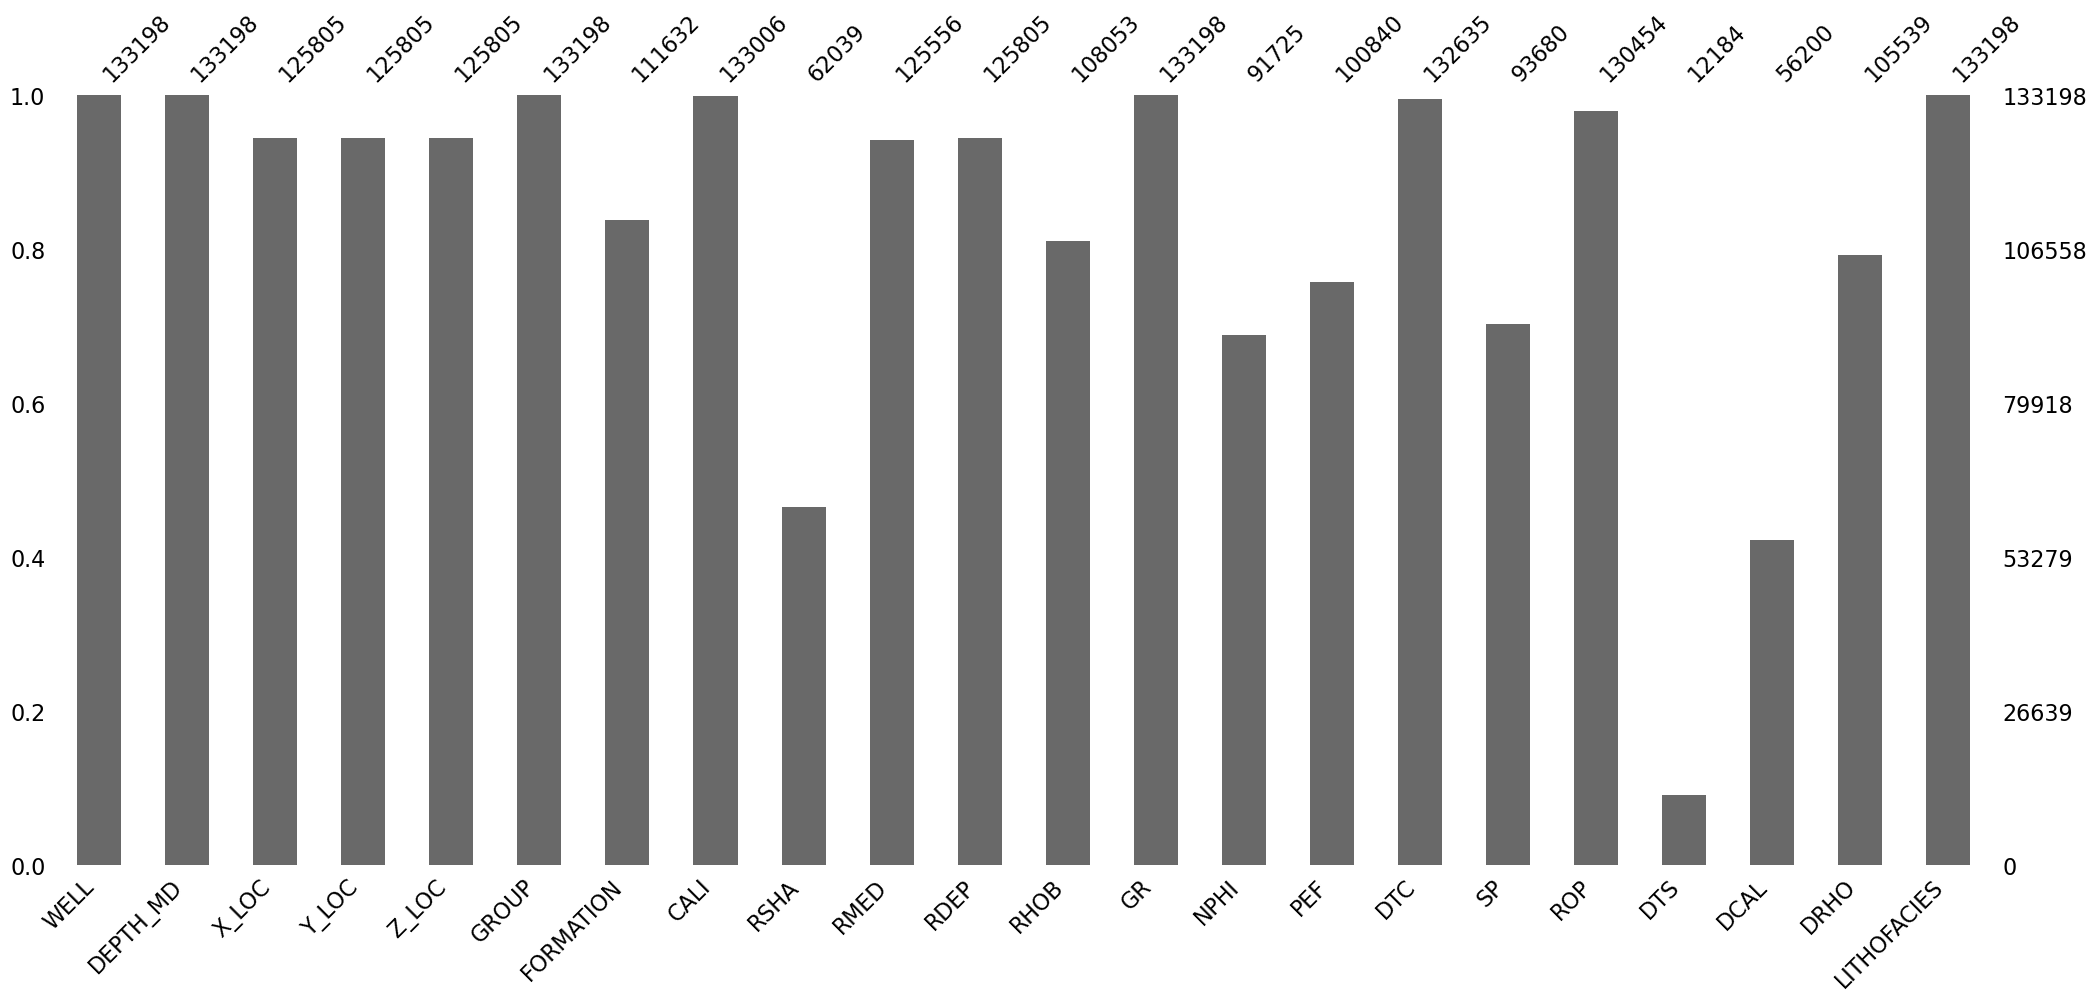

In [39]:
bar=msno.bar(df1copy)
bar

In [40]:
# % of values missing in each column
values_list = list()
cols_list = list()
for col in df1.columns:
    pct_missing = np.mean(df1[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)
pct_missing_df1 = pd.DataFrame()
pct_missing_df1['col'] = cols_list
pct_missing_df1['pct_missing'] = values_list


In [41]:
pct_missing_df1

,col,pct_missing
0,WELL,0.000000
1,DEPTH_MD,0.000000
2,X_LOC,5.550384
3,Y_LOC,5.550384
4,Z_LOC,5.550384
5,GROUP,0.000000
6,FORMATION,16.190934
7,CALI,0.144146
8,RSHA,53.423475
9,RMED,5.737323


AttributeError: module 'matplotlib.pyplot' has no attribute 'pyplot'

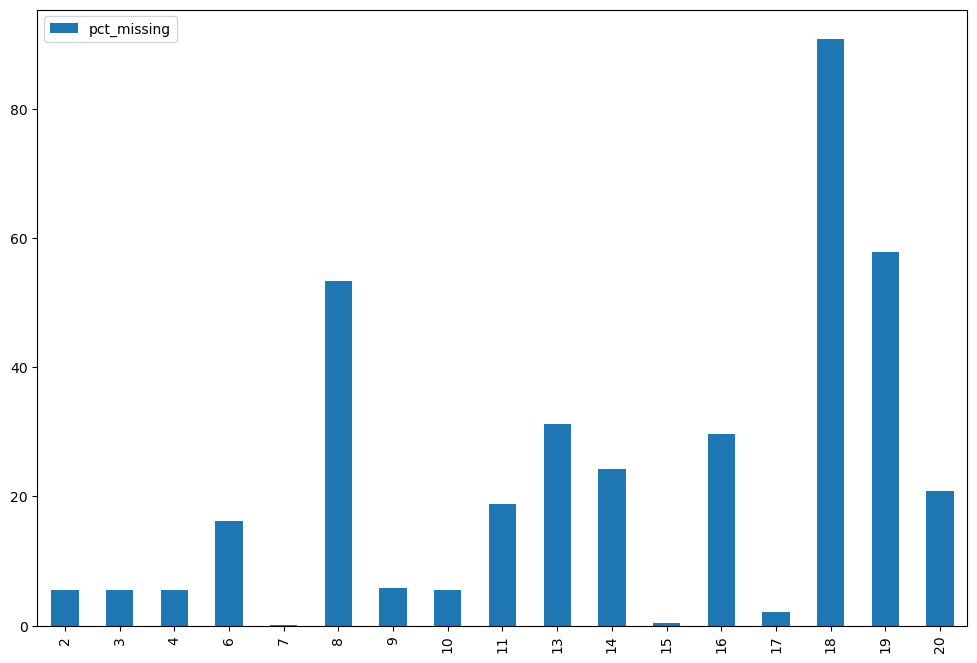

In [42]:
pct_missing_df1.loc[pct_missing_df1.pct_missing > 0].plot(kind='bar', figsize=(12,8))
plt.pyplot.show()


<Axes: >

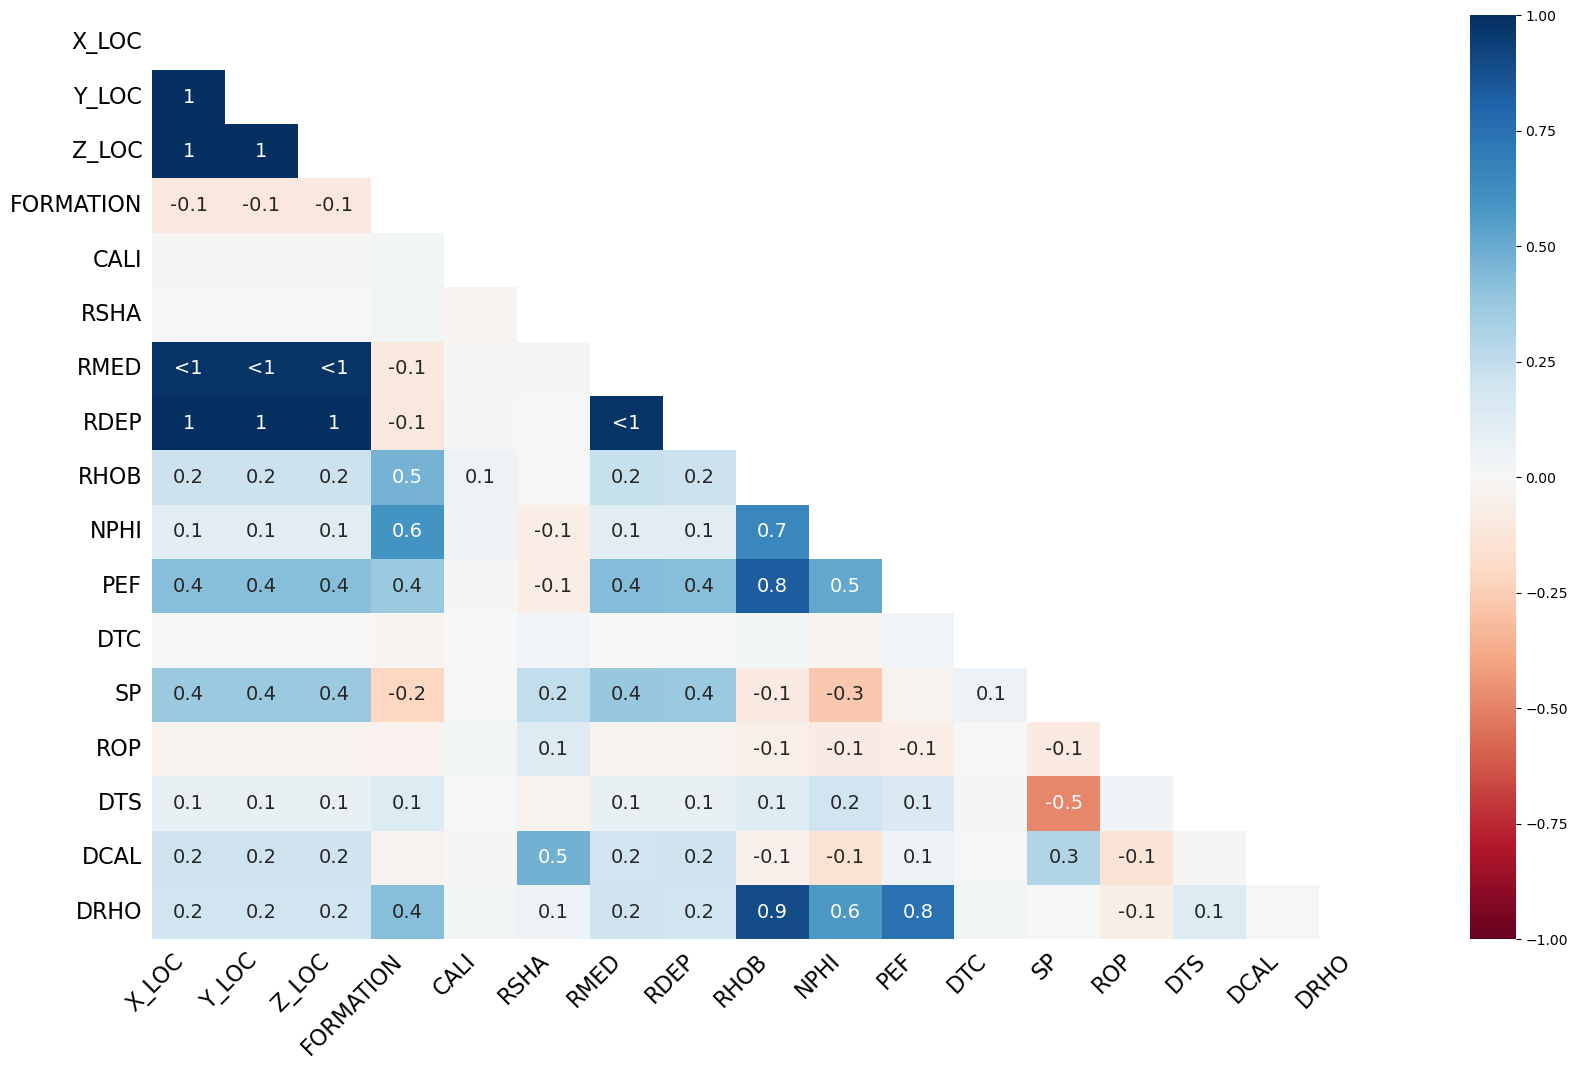

In [43]:
msno.heatmap(df1)

<Axes: >

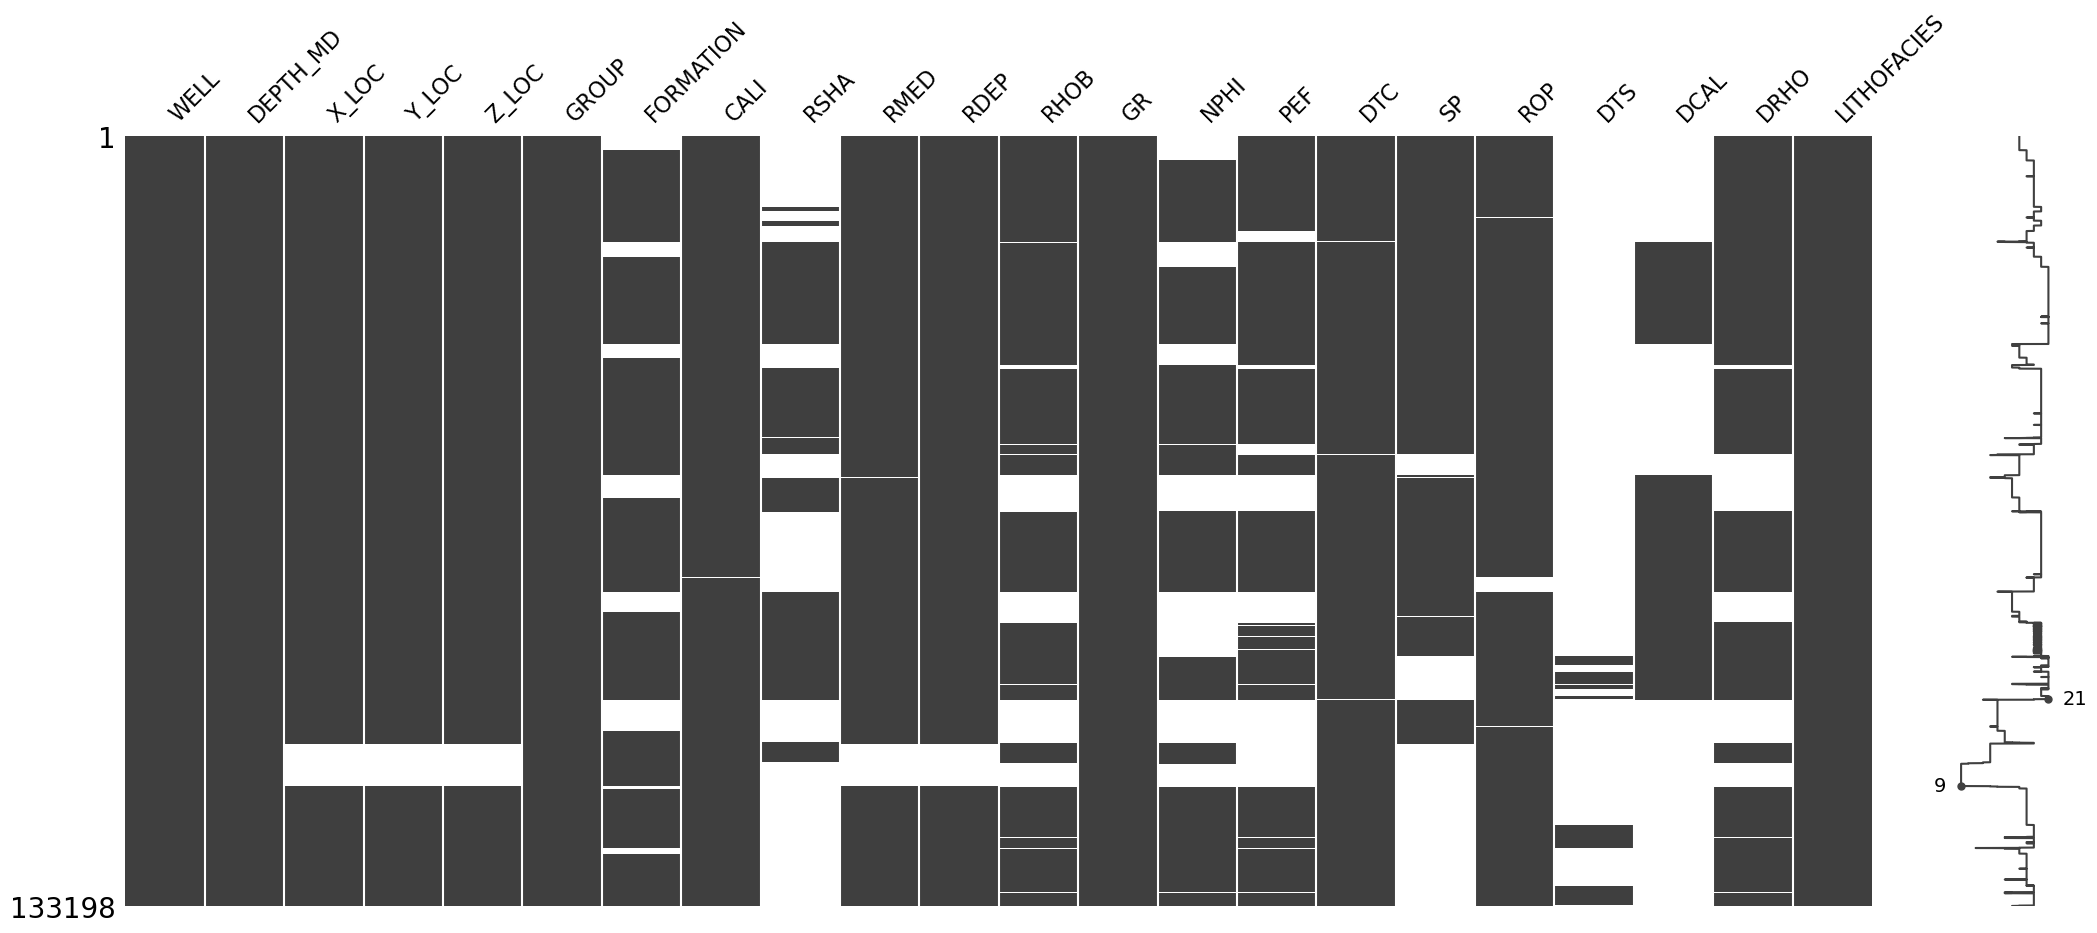

In [44]:
msno.matrix(df1)

<Axes: >

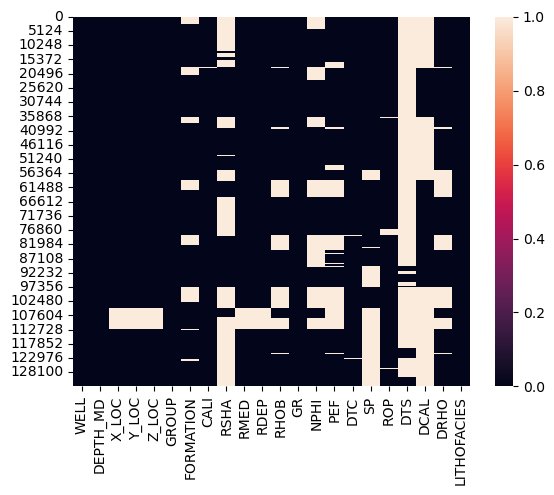

In [45]:
import seaborn as sns
sns.heatmap(df1copy.isna())

Well, if the column names are not easily readable you can always create its transposed version as below.

<Axes: >

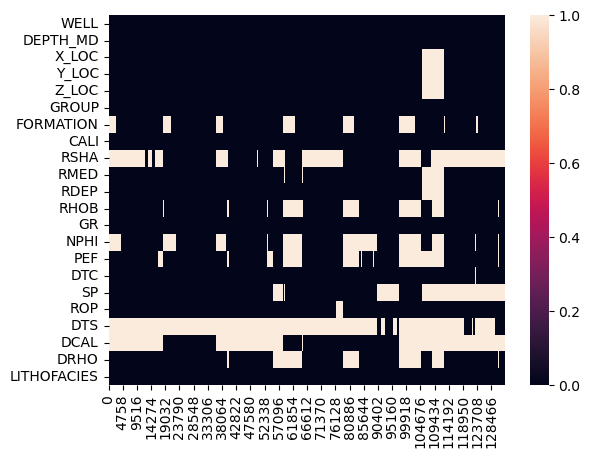

In [46]:
sns.heatmap(df1.isna().transpose())

Although heatmaps gives you an idea about the location of the missing data, it does not tell you about the amount of missing data

Missing data as a percentage of total data
There is no straightforward method to get it, but all you can use is the .isna() method and below a piece of code

In [47]:

print("Amount of missing values in - ")
for column in df1.columns:
    percentage_missing = np.mean(df1[column].isna())
    print(f'{column} : {round(percentage_missing*100)}%')

Amount of missing values in - 
WELL : 0%
DEPTH_MD : 0%
X_LOC : 6%
Y_LOC : 6%
Z_LOC : 6%
GROUP : 0%
FORMATION : 16%
CALI : 0%
RSHA : 53%
RMED : 6%
RDEP : 6%
RHOB : 19%
GR : 0%
NPHI : 31%
PEF : 24%
DTC : 0%
SP : 30%
ROP : 2%
DTS : 91%
DCAL : 58%
DRHO : 21%
LITHOFACIES : 0%


## Treating missing values 

#### Based on above observations you can use any of the below 3 methods to handle missing data.

Drop the record — Drop an entire record at an index, when a specific column has a missing value or NaN at it. Please be aware that this technique can drastically reduce the number of records in the dataset if the mentioned column has a huge number of missing values.
Drop the column or feature — This needs good research of a specific column to understand its importance in the future. You can do this only when you are confident that this feature does not provide any useful information, for example, PassengerId feature in this dataset.
Impute missing data—In this technique, you can substitute the missing values or NaNs with the mean or median or mode of the same column.

It is important to keep in mind that imputing missing values with summary statistics like mean, median, or mode can introduce bias in the data, as it assumes that the missing values are similar to the non-missing values. Additionally, the choice of imputation method can also affect the performance of the machine learning model, as it can impact the relationships between variables in the dataset.


Mean imputation is often used when the missing values are numerical and the distribution of the variable is approximately normal.

Median imputation is preferred when the distribution is skewed, as the median is less sensitive to outliers than the mean.

Mode imputation is suitable for categorical variables or numerical variables with a small number of unique values.

## Remove columns (features)
Another way to tackle missing values in a dataset would be to drop those columns or features that have a significant percentage of values missing. Such columns don’t contain a lot of information and can be dropped altogether from the dataset. In our case, let us drop all those columns that have more than 40% values missing in them.

In [48]:

_40_pct_missing_cols_list = list(pct_missing_df1.loc[pct_missing_df1.pct_missing > 40, 'col'].values)
_40_pct_missing_cols_list

['RSHA', 'DTS', 'DCAL']

### Using mean
Outliers data points will have a significant impact on the mean and hence, in such cases, it is not recommended to use the mean for replacing the missing values. Using mean values for replacing missing values may not create a great model and hence gets ruled out. For symmetric data distribution, one can use the mean value for imputing missing values.

One of the techniques is mean imputation in which the missing values are replaced with the mean value of the entire feature column. In the case of fields like salary, the data may be skewed as shown in the previous section. In such cases, it may not be a good idea to use mean imputation for replacing the missing values. Note that imputing missing data with mean values can only be done with numerical data.

In [49]:
df1copy.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC',
       'SP', 'ROP', 'DTS', 'DCAL', 'DRHO', 'LITHOFACIES'],
      dtype='object')

In [52]:
df1copy['RSHA'].isna().sum()

0

In [51]:
df1rsha=df1copy['RSHA'].mean()
df1rsha

10.561825070196186

In [50]:
df1copy['RSHA']=df1copy['RSHA'].fillna(df1copy['RSHA'].mean())
df1copy['RSHA'].isna().sum()

0

In [ ]:
df1copy['RSHA']
print(df1copy['RSHA'].unique())

In [53]:
# Impute / Replace Missing Values with Mean
dfmean=df.fillna(df.mean())
dfmean

TypeError: Could not convert ['YesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoYesNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesYesNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesYesNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoYesYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoYesNoYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNo'
 'Travel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyNon-TravelTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyNon-TravelNon-TravelTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_FrequentlyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelNon-TravelTravel_RarelyTravel_FrequentlyNon-TravelTravel_RarelyTravel_RarelyTravel_FrequentlyNon-TravelTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyNon-TravelTravel_RarelyTravel_RarelyNon-TravelTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyNon-TravelTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyNon-TravelTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_FrequentlyNon-TravelTravel_FrequentlyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyNon-TravelTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyNon-TravelTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_FrequentlyNon-TravelTravel_FrequentlyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyNon-TravelNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyNon-TravelTravel_RarelyNon-TravelTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyNon-TravelTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyNon-TravelNon-TravelTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyNon-TravelTravel_RarelyTravel_RarelyNon-TravelTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyNon-TravelNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyNon-TravelTravel_FrequentlyNon-TravelNon-TravelNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyNon-TravelTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_FrequentlyNon-TravelTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyNon-TravelTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_FrequentlyNon-TravelNon-TravelNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyNon-TravelNon-TravelTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyNon-TravelTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyNon-TravelTravel_RarelyNon-TravelTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyNon-TravelTravel_RarelyTravel_FrequentlyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyNon-TravelTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelNon-TravelTravel_FrequentlyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyNon-TravelTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyNon-TravelTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyNon-TravelTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyNon-TravelTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyNon-TravelNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyNon-TravelNon-TravelTravel_FrequentlyTravel_RarelyTravel_FrequentlyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyNon-TravelTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_FrequentlyTravel_FrequentlyNon-TravelTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_FrequentlyNon-TravelTravel_RarelyTravel_FrequentlyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyNon-TravelNon-TravelNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyNon-TravelTravel_FrequentlyTravel_RarelyTravel_FrequentlyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyTravel_RarelyNon-TravelTravel_RarelyTravel_FrequentlyTravel_RarelyTravel_RarelyTravel_FrequentlyTravel_Rarely'
 'SalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentHuman ResourcesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesSalesResearch & DevelopmentSalesResearch & DevelopmentSalesSalesSalesResearch & DevelopmentHuman ResourcesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentHuman ResourcesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentHuman ResourcesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesSalesHuman ResourcesResearch & DevelopmentResearch & DevelopmentSalesSalesHuman ResourcesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentHuman ResourcesSalesResearch & DevelopmentSalesResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentHuman ResourcesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesHuman ResourcesResearch & DevelopmentSalesResearch & DevelopmentSalesSalesResearch & DevelopmentSalesSalesSalesResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentHuman ResourcesSalesSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentHuman ResourcesResearch & DevelopmentSalesResearch & DevelopmentSalesSalesSalesSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesHuman ResourcesResearch & DevelopmentResearch & DevelopmentSalesSalesSalesResearch & DevelopmentSalesSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentHuman ResourcesSalesResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentHuman ResourcesSalesSalesSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentHuman ResourcesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentHuman ResourcesSalesResearch & DevelopmentHuman ResourcesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentHuman ResourcesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesSalesResearch & DevelopmentSalesSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentHuman ResourcesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesHuman ResourcesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesSalesResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentSalesHuman ResourcesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentHuman ResourcesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentHuman ResourcesHuman ResourcesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentSalesSalesSalesSalesSalesSalesResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesSalesSalesSalesResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentSalesSalesHuman ResourcesSalesResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentHuman ResourcesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentHuman ResourcesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesHuman ResourcesSalesResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentHuman ResourcesResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentHuman ResourcesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentHuman ResourcesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentHuman ResourcesResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentSalesSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentHuman ResourcesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentHuman ResourcesSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentHuman ResourcesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentHuman ResourcesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentHuman ResourcesResearch & DevelopmentResearch & DevelopmentSalesHuman ResourcesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesSalesSalesResearch & DevelopmentSalesResearch & DevelopmentSalesHuman ResourcesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentHuman ResourcesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesSalesResearch & DevelopmentSalesSalesHuman ResourcesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesSalesSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesHuman ResourcesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentHuman ResourcesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesSalesSalesResearch & DevelopmentHuman ResourcesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentHuman ResourcesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentHuman ResourcesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesHuman ResourcesResearch & DevelopmentHuman ResourcesHuman ResourcesSalesResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentSalesSalesSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentHuman ResourcesSalesSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentHuman ResourcesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentHuman ResourcesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentHuman ResourcesResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentHuman ResourcesHuman ResourcesSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentHuman ResourcesResearch & DevelopmentResearch & DevelopmentSalesSalesSalesHuman ResourcesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentHuman ResourcesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesSalesSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesHuman ResourcesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesSalesResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentHuman ResourcesHuman ResourcesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesHuman ResourcesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentSalesResearch & DevelopmentSalesSalesResearch & DevelopmentSalesResearch & DevelopmentSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesSalesResearch & DevelopmentHuman ResourcesSalesSalesSalesSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesSalesResearch & DevelopmentSalesResearch & DevelopmentResearch & DevelopmentResearch & DevelopmentSalesResearch & Development'
 'Life SciencesLife SciencesOtherLife SciencesMedicalLife SciencesMedicalLife SciencesLife SciencesMedicalMedicalLife SciencesLife SciencesMedicalLife SciencesLife SciencesLife SciencesMedicalLife SciencesLife SciencesOtherLife SciencesLife SciencesLife SciencesMedicalOtherLife SciencesMarketingMedicalMarketingMedicalOtherMedicalTechnical DegreeMedicalMedicalMarketingMarketingLife SciencesLife SciencesOtherLife SciencesLife SciencesLife SciencesMedicalTechnical DegreeMarketingLife SciencesMarketingLife SciencesLife SciencesTechnical DegreeMarketingMedicalMarketingLife SciencesLife SciencesMedicalLife SciencesLife SciencesMedicalLife SciencesMedicalLife SciencesTechnical DegreeMedicalLife SciencesLife SciencesMedicalMedicalLife SciencesLife SciencesMedicalLife SciencesLife SciencesLife SciencesMarketingOtherMedicalMedicalLife SciencesMedicalLife SciencesMedicalMedicalLife SciencesTechnical DegreeLife SciencesLife SciencesMedicalLife SciencesMarketingMedicalMedicalMedicalTechnical DegreeOtherMedicalMedicalMedicalHuman ResourcesLife SciencesLife SciencesOtherLife SciencesHuman ResourcesLife SciencesMarketingMedicalMedicalMedicalLife SciencesHuman ResourcesLife SciencesLife SciencesLife SciencesMedicalTechnical DegreeLife SciencesLife SciencesLife SciencesMarketingLife SciencesLife SciencesLife SciencesOtherMedicalMarketingTechnical DegreeMedicalMedicalMarketingLife SciencesLife SciencesLife SciencesMedicalLife SciencesLife SciencesLife SciencesHuman ResourcesMedicalMedicalTechnical DegreeLife SciencesMedicalTechnical DegreeMedicalLife SciencesLife SciencesMedicalMedicalMarketingMarketingLife SciencesMarketingTechnical DegreeMedicalMedicalMarketingMarketingMedicalMedicalMedicalLife SciencesMedicalLife SciencesLife SciencesLife SciencesLife SciencesLife SciencesTechnical DegreeTechnical DegreeMedicalMedicalLife SciencesLife SciencesLife SciencesLife SciencesMarketingLife SciencesMedicalMedicalMarketingMedicalMedicalMedicalMedicalMedicalLife SciencesMedicalLife SciencesMedicalLife SciencesMedicalMedicalLife SciencesMedicalMedicalLife SciencesTechnical DegreeTechnical DegreeLife SciencesMedicalMedicalMedicalMarketingLife SciencesMedicalLife SciencesMedicalMedicalLife SciencesLife SciencesLife SciencesTechnical DegreeLife SciencesMarketingTechnical DegreeMedicalMarketingLife SciencesMedicalOtherLife SciencesMedicalLife SciencesMarketingMedicalMarketingMedicalLife SciencesTechnical DegreeMedicalMedicalMedicalMarketingLife SciencesLife SciencesLife SciencesLife SciencesMedicalMarketingLife SciencesTechnical DegreeOtherMedicalLife SciencesLife SciencesMedicalLife SciencesMedicalTechnical DegreeLife SciencesLife SciencesMarketingLife SciencesMedicalMedicalLife SciencesMedicalLife SciencesLife SciencesTechnical DegreeTechnical DegreeLife SciencesMedicalMedicalLife SciencesMedicalLife SciencesMedicalLife SciencesMedicalMedicalMedicalMedicalLife SciencesMedicalLife SciencesLife SciencesMedicalLife SciencesLife SciencesTechnical DegreeMedicalLife SciencesLife SciencesLife SciencesMedicalLife SciencesLife SciencesTechnical DegreeMarketingMarketingMedicalMarketingLife SciencesMarketingLife SciencesMedicalLife SciencesMedicalMedicalTechnical DegreeMedicalLife SciencesLife SciencesLife SciencesLife SciencesTechnical DegreeHuman ResourcesLife SciencesLife SciencesLife SciencesMedicalLife SciencesTechnical DegreeMedicalLife SciencesTechnical DegreeLife SciencesMarketingMedicalMedicalMedicalLife SciencesMedicalMedicalMarketingLife SciencesLife SciencesMarketingLife SciencesLife SciencesOtherMedicalOtherOtherMarketingMarketingMedicalLife SciencesMedicalMarketingTechnical DegreeLife SciencesMedicalMedicalLife SciencesLife SciencesTechnical DegreeMedicalMedicalMedicalTechnical DegreeLife SciencesOtherTechnical DegreeMedicalMedicalMedicalLife SciencesMedicalMarketingMedicalMedicalMarketingTechnical DegreeMarketingLife SciencesLife SciencesLife SciencesLife SciencesMedicalLife SciencesOtherLife SciencesLife SciencesMarketingLife SciencesMarketingTechnical DegreeTechnical DegreeMedicalMedicalTechnical DegreeLife SciencesMarketingLife SciencesLife SciencesLife SciencesMedicalMedicalMarketingMedicalMedicalOtherLife SciencesMedicalLife SciencesLife SciencesLife SciencesTechnical DegreeMarketingMedicalMedicalMedicalLife SciencesLife SciencesLife SciencesLife SciencesLife SciencesMedicalTechnical DegreeTechnical DegreeMarketingLife SciencesLife SciencesLife SciencesLife SciencesMedicalTechnical DegreeTechnical DegreeOtherMarketingLife SciencesMedicalMarketingMedicalLife SciencesLife SciencesLife SciencesLife SciencesMarketingLife SciencesMedicalMedicalMarketingLife SciencesLife SciencesHuman ResourcesOtherMedicalTechnical DegreeMarketingLife SciencesLife SciencesMarketingLife SciencesLife SciencesLife SciencesMedicalOtherLife SciencesTechnical DegreeMedicalLife SciencesMarketingOtherOtherMedicalMedicalLife SciencesTechnical DegreeTechnical DegreeMedicalLife SciencesMedicalTechnical DegreeOtherMedicalMedicalLife SciencesLife SciencesMedicalMarketingOtherMedicalMedicalLife SciencesLife SciencesLife SciencesMedicalOtherMedicalMedicalMarketingLife SciencesLife SciencesOtherLife SciencesMedicalLife SciencesLife SciencesTechnical DegreeMarketingTechnical DegreeOtherMedicalMarketingLife SciencesMedicalMedicalLife SciencesLife SciencesLife SciencesOtherMedicalLife SciencesLife SciencesMedicalMedicalMedicalMedicalLife SciencesLife SciencesMedicalLife SciencesMarketingLife SciencesMarketingMedicalLife SciencesMedicalMedicalLife SciencesTechnical DegreeMarketingTechnical DegreeLife SciencesLife SciencesLife SciencesMarketingLife SciencesLife SciencesHuman ResourcesMarketingLife SciencesHuman ResourcesMarketingLife SciencesLife SciencesLife SciencesMedicalMedicalMarketingLife SciencesMedicalLife SciencesMedicalMedicalHuman ResourcesMedicalMedicalMedicalMarketingLife SciencesLife SciencesLife SciencesMedicalLife SciencesMarketingOtherMedicalTechnical DegreeMedicalLife SciencesOtherMedicalLife SciencesMedicalLife SciencesMedicalTechnical DegreeLife SciencesMedicalMarketingLife SciencesLife SciencesMedicalLife SciencesLife SciencesMedicalLife SciencesLife SciencesLife SciencesLife SciencesLife SciencesMedicalLife SciencesMedicalMarketingOtherOtherLife SciencesLife SciencesLife SciencesLife SciencesMedicalHuman ResourcesLife SciencesMedicalMedicalLife SciencesLife SciencesLife SciencesLife SciencesMarketingMedicalLife SciencesTechnical DegreeOtherMarketingHuman ResourcesMedicalMedicalMarketingMedicalMedicalMedicalMedicalLife SciencesLife SciencesLife SciencesMarketingMarketingMedicalMedicalMarketingMedicalLife SciencesLife SciencesMedicalLife SciencesOtherLife SciencesLife SciencesLife SciencesMarketingTechnical DegreeLife SciencesLife SciencesMarketingLife SciencesLife SciencesMedicalMarketingTechnical DegreeMedicalLife SciencesLife SciencesMarketingMedicalLife SciencesLife SciencesHuman ResourcesLife SciencesMedicalLife SciencesMedicalLife SciencesLife SciencesMedicalOtherLife SciencesLife SciencesLife SciencesLife SciencesMedicalMedicalLife SciencesLife SciencesMedicalOtherTechnical DegreeLife SciencesLife SciencesOtherMedicalMarketingOtherTechnical DegreeLife SciencesMarketingMarketingMedicalMedicalMedicalOtherTechnical DegreeMedicalMedicalMedicalLife SciencesLife SciencesLife SciencesLife SciencesTechnical DegreeMedicalLife SciencesTechnical DegreeMedicalOtherTechnical DegreeLife SciencesLife SciencesLife SciencesMedicalTechnical DegreeMedicalLife SciencesLife SciencesLife SciencesMedicalMedicalOtherMedicalTechnical DegreeLife SciencesLife SciencesLife SciencesLife SciencesMedicalMedicalMedicalOtherLife SciencesLife SciencesTechnical DegreeMedicalLife SciencesMedicalMedicalMedicalLife SciencesLife SciencesLife SciencesMedicalLife SciencesLife SciencesOtherMarketingLife SciencesLife SciencesMedicalMedicalLife SciencesLife SciencesMedicalMarketingMedicalLife SciencesLife SciencesMedicalLife SciencesLife SciencesMedicalMarketingTechnical DegreeMedicalMarketingOtherLife SciencesLife SciencesMedicalOtherMedicalOtherMarketingMedicalMedicalLife SciencesMedicalMedicalMedicalMedicalMarketingLife SciencesLife SciencesLife SciencesTechnical DegreeMedicalOtherTechnical DegreeLife SciencesTechnical DegreeLife SciencesLife SciencesOtherMedicalLife SciencesTechnical DegreeMedicalLife SciencesLife SciencesLife SciencesTechnical DegreeMedicalMedicalMedicalMedicalOtherLife SciencesLife SciencesMedicalLife SciencesLife SciencesMarketingLife SciencesMedicalMarketingMarketingLife SciencesLife SciencesMedicalTechnical DegreeLife SciencesLife SciencesLife SciencesLife SciencesMarketingTechnical DegreeLife SciencesLife SciencesMedicalMedicalHuman ResourcesLife SciencesMedicalMarketingLife SciencesMedicalMedicalLife SciencesLife SciencesTechnical DegreeLife SciencesMedicalLife SciencesMarketingMedicalMedicalLife SciencesMedicalMarketingMedicalLife SciencesMedicalOtherMarketingLife SciencesTechnical DegreeMedicalLife SciencesMedicalLife SciencesLife SciencesLife SciencesMedicalLife SciencesLife SciencesMarketingLife SciencesHuman ResourcesLife SciencesLife SciencesMedicalMedicalMedicalLife SciencesLife SciencesLife SciencesMedicalLife SciencesLife SciencesOtherMarketingTechnical DegreeMedicalMarketingOtherLife SciencesTechnical DegreeMedicalTechnical DegreeLife SciencesMedicalMedicalMarketingLife SciencesLife SciencesLife SciencesMedicalLife SciencesLife SciencesMedicalMedicalLife SciencesLife SciencesMedicalTechnical DegreeTechnical DegreeLife SciencesLife SciencesLife SciencesLife SciencesTechnical DegreeMarketingMarketingLife SciencesLife SciencesLife SciencesLife SciencesMarketingMedicalLife SciencesMarketingMarketingLife SciencesMedicalMedicalMedicalLife SciencesLife SciencesLife SciencesMedicalMarketingLife SciencesMedicalLife SciencesMedicalMedicalTechnical DegreeTechnical DegreeMedicalMedicalMedicalMedicalLife SciencesLife SciencesMedicalTechnical DegreeTechnical DegreeLife SciencesLife SciencesLife SciencesMarketingLife SciencesMedicalLife SciencesLife SciencesMedicalLife SciencesLife SciencesLife SciencesMedicalLife SciencesLife SciencesLife SciencesLife SciencesMarketingLife SciencesLife SciencesLife SciencesMedicalMedicalMedicalLife SciencesMarketingLife SciencesMedicalTechnical DegreeLife SciencesMedicalLife SciencesMarketingLife SciencesTechnical DegreeMedicalMedicalLife SciencesMarketingLife SciencesTechnical DegreeLife SciencesMedicalLife SciencesMarketingLife SciencesLife SciencesLife SciencesMarketingLife SciencesLife SciencesMedicalMedicalMarketingLife SciencesMedicalHuman ResourcesOtherMedicalLife SciencesTechnical DegreeOtherOtherLife SciencesOtherMedicalMedicalMedicalMarketingLife SciencesMarketingLife SciencesOtherLife SciencesLife SciencesLife SciencesMarketingTechnical DegreeLife SciencesTechnical DegreeLife SciencesMedicalMedicalMarketingLife SciencesMedicalOtherLife SciencesMarketingLife SciencesLife SciencesMedicalMedicalLife SciencesTechnical DegreeMarketingTechnical DegreeMedicalMedicalLife SciencesMedicalTechnical DegreeMedicalLife SciencesMedicalOtherLife SciencesMedicalMarketingTechnical DegreeLife SciencesLife SciencesMedicalTechnical DegreeTechnical DegreeMedicalLife SciencesMedicalLife SciencesMedicalLife SciencesLife SciencesLife SciencesMedicalMedicalMedicalLife SciencesLife SciencesMedicalLife SciencesLife SciencesLife SciencesMedicalMedicalTechnical DegreeLife SciencesLife SciencesLife SciencesLife SciencesLife SciencesLife SciencesTechnical DegreeLife SciencesMedicalTechnical DegreeMedicalMedicalOtherLife SciencesTechnical DegreeLife SciencesMedicalLife SciencesMedicalTechnical DegreeLife SciencesTechnical DegreeLife SciencesLife SciencesLife SciencesLife SciencesLife SciencesLife SciencesLife SciencesHuman ResourcesMedicalTechnical DegreeLife SciencesTechnical DegreeMedicalTechnical DegreeOtherMedicalMarketingLife SciencesLife SciencesLife SciencesLife SciencesLife SciencesMedicalMedicalMedicalLife SciencesMarketingTechnical DegreeLife SciencesOtherLife SciencesTechnical DegreeLife SciencesTechnical DegreeLife SciencesLife SciencesMedicalOtherMedicalOtherMedicalMedicalMedicalMarketingOtherLife SciencesLife SciencesLife SciencesMedicalOtherLife SciencesMedicalMedicalMedicalLife SciencesMedicalLife SciencesLife SciencesLife SciencesMedicalOtherMedicalMedicalMedicalLife SciencesHuman ResourcesMedicalMedicalTechnical DegreeMedicalMedicalLife SciencesMedicalLife SciencesLife SciencesMedicalOtherLife SciencesMedicalLife SciencesLife SciencesLife SciencesMedicalLife SciencesMedicalLife SciencesOtherLife SciencesMedicalMedicalMedicalLife SciencesMedicalMedicalLife SciencesLife SciencesLife SciencesLife SciencesLife SciencesLife SciencesLife SciencesMedicalMedicalMedicalMedicalLife SciencesMedicalTechnical DegreeMedicalMedicalMedicalMedicalLife SciencesLife SciencesLife SciencesMedicalMedicalMedicalMarketingMedicalLife SciencesLife SciencesHuman ResourcesLife SciencesMedicalTechnical DegreeLife SciencesLife SciencesHuman ResourcesLife SciencesMedicalLife SciencesLife SciencesLife SciencesMarketingLife SciencesMarketingLife SciencesMedicalTechnical DegreeLife SciencesLife SciencesMedicalLife SciencesTechnical DegreeMedicalHuman ResourcesTechnical DegreeMedicalMarketingLife SciencesMarketingMedicalMarketingMarketingLife SciencesMedicalMarketingTechnical DegreeLife SciencesTechnical DegreeMedicalTechnical DegreeMedicalMedicalTechnical DegreeLife SciencesLife SciencesMedicalLife SciencesLife SciencesMarketingOtherMedicalMarketingTechnical DegreeMarketingMedicalLife SciencesMedicalOtherLife SciencesLife SciencesLife SciencesMedicalLife SciencesLife SciencesMedicalMedicalHuman ResourcesLife SciencesMedicalLife SciencesLife SciencesLife SciencesMarketingMedicalMedicalMedicalLife SciencesTechnical DegreeMedicalMedicalLife SciencesLife SciencesMedicalMarketingMedicalMarketingMedicalLife SciencesMedicalHuman ResourcesHuman ResourcesLife SciencesOtherLife SciencesLife SciencesMedicalMarketingTechnical DegreeLife SciencesLife SciencesLife SciencesLife SciencesLife SciencesMarketingTechnical DegreeMedicalMedicalMedicalLife SciencesLife SciencesLife SciencesLife SciencesOtherTechnical DegreeMedicalMedicalLife SciencesTechnical DegreeLife SciencesLife SciencesLife SciencesMedicalOtherLife SciencesHuman ResourcesLife SciencesLife SciencesMedicalMedicalLife SciencesTechnical DegreeLife SciencesMarketingMarketingMedicalMedicalMedicalMedicalOtherMedicalMarketingLife SciencesTechnical DegreeLife SciencesTechnical DegreeOtherMarketingTechnical DegreeMarketingMedicalMedicalLife SciencesLife SciencesLife SciencesLife SciencesMarketingHuman ResourcesMedicalMedicalMedicalLife SciencesMarketingMedicalMedicalLife SciencesMedicalLife SciencesTechnical DegreeLife SciencesLife SciencesMarketingLife SciencesMarketingLife SciencesLife SciencesLife SciencesLife SciencesOtherHuman ResourcesMedicalMarketingLife SciencesMedicalMedicalLife SciencesOtherTechnical DegreeMarketingHuman ResourcesMedicalOtherMedicalMedicalLife SciencesLife SciencesLife SciencesLife SciencesLife SciencesMedicalMedicalLife SciencesMedicalMedicalLife SciencesLife SciencesMedicalLife SciencesMedicalMarketingLife SciencesOtherLife SciencesMedicalMedicalLife SciencesMarketingMedicalLife SciencesLife SciencesMedicalLife SciencesTechnical DegreeLife SciencesMarketingMarketingLife SciencesTechnical DegreeLife SciencesLife SciencesLife SciencesMarketingLife SciencesLife SciencesLife SciencesMedicalLife SciencesOtherMedicalMarketingMarketingMedicalOtherMedicalMedicalLife SciencesMedicalMedical'
 'FemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleMaleMaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleMaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFemaleFemaleMaleFemaleFemaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleMaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFemaleFemaleFemaleMaleMaleMaleMaleMaleMaleMaleMaleMaleFemaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleMaleFemaleFemaleMaleMaleMaleFemaleFemaleMaleFemaleFemaleMaleMaleFemaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleMaleMaleMaleMale'
 'Sales ExecutiveResearch ScientistLaboratory TechnicianResearch ScientistLaboratory TechnicianLaboratory TechnicianLaboratory TechnicianLaboratory TechnicianManufacturing DirectorHealthcare RepresentativeLaboratory TechnicianLaboratory TechnicianResearch ScientistLaboratory TechnicianLaboratory TechnicianManufacturing DirectorResearch ScientistLaboratory TechnicianManagerResearch ScientistManufacturing DirectorSales RepresentativeResearch DirectorResearch ScientistResearch ScientistManagerResearch ScientistSales ExecutiveHealthcare RepresentativeManagerLaboratory TechnicianHealthcare RepresentativeLaboratory TechnicianSales RepresentativeResearch ScientistResearch ScientistSales RepresentativeSales RepresentativeResearch ScientistSales ExecutiveLaboratory TechnicianLaboratory TechnicianLaboratory TechnicianSales ExecutiveLaboratory TechnicianResearch DirectorSales ExecutiveResearch ScientistSales ExecutiveLaboratory TechnicianLaboratory TechnicianLaboratory TechnicianSales ExecutiveHealthcare RepresentativeSales ExecutiveResearch DirectorSales ExecutiveLaboratory TechnicianLaboratory TechnicianManufacturing DirectorManufacturing DirectorLaboratory TechnicianResearch DirectorSales ExecutiveHealthcare RepresentativeManagerManufacturing DirectorResearch ScientistResearch ScientistResearch ScientistSales ExecutiveResearch ScientistResearch ScientistResearch ScientistLaboratory TechnicianManufacturing DirectorSales ExecutiveResearch DirectorResearch DirectorHuman ResourcesLaboratory TechnicianResearch ScientistSales ExecutiveResearch ScientistManufacturing DirectorManufacturing DirectorSales RepresentativeLaboratory TechnicianHealthcare RepresentativeSales ExecutiveHealthcare RepresentativeSales ExecutiveSales ExecutiveHealthcare RepresentativeSales ExecutiveResearch DirectorSales ExecutiveSales ExecutiveSales ExecutiveLaboratory TechnicianHuman ResourcesResearch ScientistLaboratory TechnicianResearch ScientistHealthcare RepresentativeManagerResearch DirectorSales ExecutiveResearch ScientistLaboratory TechnicianHealthcare RepresentativeLaboratory TechnicianManagerLaboratory TechnicianResearch ScientistSales ExecutiveManagerSales ExecutiveLaboratory TechnicianManagerResearch ScientistSales ExecutiveResearch ScientistResearch DirectorSales ExecutiveResearch ScientistHealthcare RepresentativeSales RepresentativeLaboratory TechnicianManufacturing DirectorResearch ScientistSales ExecutiveSales ExecutiveSales ExecutiveHuman ResourcesManufacturing DirectorManufacturing DirectorSales ExecutiveSales ExecutiveHuman ResourcesLaboratory TechnicianResearch ScientistResearch ScientistResearch ScientistSales ExecutiveResearch ScientistLaboratory TechnicianManagerLaboratory TechnicianLaboratory TechnicianResearch ScientistSales ExecutiveSales RepresentativeLaboratory TechnicianSales ExecutiveManufacturing DirectorManufacturing DirectorResearch ScientistSales ExecutiveSales RepresentativeResearch ScientistResearch ScientistResearch ScientistHealthcare RepresentativeResearch ScientistManagerResearch ScientistSales ExecutiveSales ExecutiveResearch ScientistResearch ScientistSales RepresentativeLaboratory TechnicianLaboratory TechnicianSales ExecutiveResearch ScientistResearch ScientistLaboratory TechnicianSales ExecutiveLaboratory TechnicianResearch ScientistResearch ScientistSales RepresentativeLaboratory TechnicianManufacturing DirectorResearch ScientistManagerResearch DirectorManufacturing DirectorHealthcare RepresentativeManagerResearch ScientistManufacturing DirectorResearch ScientistManagerResearch ScientistLaboratory TechnicianManufacturing DirectorManufacturing DirectorManufacturing DirectorManufacturing DirectorManufacturing DirectorResearch ScientistLaboratory TechnicianHealthcare RepresentativeSales ExecutiveResearch ScientistLaboratory TechnicianHealthcare RepresentativeHealthcare RepresentativeSales ExecutiveManufacturing DirectorSales ExecutiveResearch DirectorResearch ScientistManagerSales ExecutiveResearch ScientistSales ExecutiveSales ExecutiveLaboratory TechnicianResearch ScientistResearch DirectorSales ExecutiveManufacturing DirectorResearch ScientistSales RepresentativeSales ExecutiveSales ExecutiveResearch ScientistLaboratory TechnicianManagerHuman ResourcesManagerLaboratory TechnicianManagerLaboratory TechnicianManagerSales RepresentativeLaboratory TechnicianLaboratory TechnicianSales ExecutiveResearch ScientistResearch ScientistManagerResearch DirectorResearch ScientistManufacturing DirectorResearch ScientistManufacturing DirectorManufacturing DirectorHealthcare RepresentativeResearch ScientistResearch ScientistSales ExecutiveManufacturing DirectorLaboratory TechnicianResearch DirectorResearch ScientistLaboratory TechnicianLaboratory TechnicianSales ExecutiveLaboratory TechnicianManagerLaboratory TechnicianSales ExecutiveHealthcare RepresentativeHealthcare RepresentativeHealthcare RepresentativeLaboratory TechnicianManagerManagerResearch ScientistSales ExecutiveResearch ScientistResearch DirectorManagerSales ExecutiveManufacturing DirectorResearch DirectorResearch DirectorSales ExecutiveSales ExecutiveLaboratory TechnicianHealthcare RepresentativeResearch ScientistLaboratory TechnicianHealthcare RepresentativeLaboratory TechnicianResearch ScientistResearch DirectorResearch ScientistSales RepresentativeSales ExecutiveResearch ScientistSales ExecutiveLaboratory TechnicianSales ExecutiveLaboratory TechnicianManufacturing DirectorManagerSales RepresentativeHealthcare RepresentativeSales ExecutiveHealthcare RepresentativeLaboratory TechnicianSales ExecutiveResearch DirectorHealthcare RepresentativeResearch ScientistHuman ResourcesLaboratory TechnicianResearch ScientistManagerManagerLaboratory TechnicianHealthcare RepresentativeResearch ScientistResearch ScientistSales ExecutiveSales ExecutiveSales ExecutiveResearch ScientistResearch ScientistResearch ScientistManufacturing DirectorManagerSales ExecutiveSales ExecutiveResearch DirectorLaboratory TechnicianSales ExecutiveResearch ScientistHealthcare RepresentativeResearch ScientistSales ExecutiveLaboratory TechnicianLaboratory TechnicianSales ExecutiveSales ExecutiveManufacturing DirectorResearch DirectorManufacturing DirectorSales ExecutiveManufacturing DirectorResearch ScientistManufacturing DirectorSales RepresentativeResearch DirectorSales ExecutiveHuman ResourcesLaboratory TechnicianManagerResearch ScientistSales ExecutiveSales ExecutiveHealthcare RepresentativeSales RepresentativeSales ExecutiveSales ExecutiveHealthcare RepresentativeLaboratory TechnicianSales RepresentativeSales RepresentativeLaboratory TechnicianManufacturing DirectorSales ExecutiveHealthcare RepresentativeSales ExecutiveResearch ScientistSales RepresentativeResearch ScientistHealthcare RepresentativeLaboratory TechnicianSales ExecutiveHealthcare RepresentativeSales ExecutiveResearch ScientistSales ExecutiveManagerSales ExecutiveSales RepresentativeResearch ScientistResearch ScientistSales ExecutiveResearch ScientistLaboratory TechnicianSales ExecutiveLaboratory TechnicianManufacturing DirectorResearch DirectorLaboratory TechnicianResearch DirectorSales ExecutiveManufacturing DirectorLaboratory TechnicianHealthcare RepresentativeSales ExecutiveResearch ScientistLaboratory TechnicianManagerSales ExecutiveSales ExecutiveSales ExecutiveLaboratory TechnicianLaboratory TechnicianManufacturing DirectorResearch ScientistManagerResearch ScientistManufacturing DirectorManagerManufacturing DirectorHealthcare RepresentativeSales RepresentativeSales RepresentativeLaboratory TechnicianManagerResearch ScientistLaboratory TechnicianResearch DirectorResearch ScientistHuman ResourcesSales ExecutiveManagerManagerLaboratory TechnicianSales ExecutiveManufacturing DirectorResearch DirectorLaboratory TechnicianLaboratory TechnicianResearch ScientistSales ExecutiveManufacturing DirectorManagerLaboratory TechnicianSales RepresentativeHealthcare RepresentativeHealthcare RepresentativeHuman ResourcesLaboratory TechnicianSales ExecutiveLaboratory TechnicianSales ExecutiveManagerSales ExecutiveSales ExecutiveManufacturing DirectorLaboratory TechnicianSales ExecutiveManufacturing DirectorSales ExecutiveHuman ResourcesManufacturing DirectorResearch DirectorManagerSales RepresentativeSales ExecutiveHealthcare RepresentativeSales ExecutiveSales ExecutiveSales ExecutiveLaboratory TechnicianManufacturing DirectorHealthcare RepresentativeManagerSales ExecutiveResearch ScientistSales ExecutiveSales RepresentativeHealthcare RepresentativeManufacturing DirectorResearch DirectorResearch ScientistSales ExecutiveLaboratory TechnicianManagerSales RepresentativeLaboratory TechnicianSales RepresentativeResearch ScientistSales ExecutiveLaboratory TechnicianSales ExecutiveResearch ScientistSales ExecutiveResearch ScientistHealthcare RepresentativeResearch DirectorResearch ScientistLaboratory TechnicianManagerHuman ResourcesSales RepresentativeSales RepresentativeSales RepresentativeManagerResearch ScientistSales ExecutiveResearch ScientistResearch ScientistSales ExecutiveResearch ScientistSales ExecutiveLaboratory TechnicianManufacturing DirectorSales ExecutiveResearch ScientistHealthcare RepresentativeHuman ResourcesManufacturing DirectorResearch ScientistResearch ScientistResearch ScientistLaboratory TechnicianResearch ScientistSales ExecutiveSales ExecutiveResearch ScientistSales ExecutiveSales ExecutiveResearch ScientistLaboratory TechnicianHealthcare RepresentativeSales ExecutiveHealthcare RepresentativeSales ExecutiveSales ExecutiveHealthcare RepresentativeManufacturing DirectorResearch DirectorSales ExecutiveSales ExecutiveResearch DirectorManagerSales ExecutiveManufacturing DirectorManagerSales RepresentativeResearch ScientistResearch DirectorManufacturing DirectorLaboratory TechnicianSales ExecutiveSales ExecutiveSales RepresentativeResearch ScientistSales ExecutiveHealthcare RepresentativeLaboratory TechnicianHuman ResourcesHealthcare RepresentativeResearch ScientistHealthcare RepresentativeSales RepresentativeLaboratory TechnicianHealthcare RepresentativeLaboratory TechnicianResearch ScientistManufacturing DirectorManagerResearch ScientistSales ExecutiveSales RepresentativeResearch ScientistSales ExecutiveSales ExecutiveManagerSales ExecutiveResearch ScientistLaboratory TechnicianHealthcare RepresentativeSales ExecutiveResearch ScientistManufacturing DirectorSales ExecutiveResearch ScientistManufacturing DirectorResearch ScientistSales RepresentativeLaboratory TechnicianHealthcare RepresentativeSales ExecutiveManagerLaboratory TechnicianLaboratory TechnicianLaboratory TechnicianResearch DirectorLaboratory TechnicianResearch DirectorSales ExecutiveManagerManufacturing DirectorResearch ScientistResearch DirectorResearch ScientistManufacturing DirectorResearch ScientistHuman ResourcesManufacturing DirectorLaboratory TechnicianManufacturing DirectorResearch ScientistManufacturing DirectorHealthcare RepresentativeResearch ScientistSales ExecutiveSales ExecutiveResearch DirectorResearch DirectorManufacturing DirectorSales ExecutiveHuman ResourcesResearch ScientistResearch ScientistManagerHealthcare RepresentativeResearch ScientistSales ExecutiveResearch ScientistSales ExecutiveSales ExecutiveResearch ScientistSales ExecutiveSales ExecutiveResearch ScientistManufacturing DirectorSales ExecutiveHuman ResourcesManufacturing DirectorLaboratory TechnicianResearch ScientistHuman ResourcesSales ExecutiveManufacturing DirectorResearch ScientistLaboratory TechnicianSales ExecutiveResearch ScientistLaboratory TechnicianSales ExecutiveSales RepresentativeLaboratory TechnicianResearch ScientistSales RepresentativeSales ExecutiveManufacturing DirectorSales RepresentativeResearch DirectorHealthcare RepresentativeSales ExecutiveSales ExecutiveManagerHuman ResourcesHuman ResourcesLaboratory TechnicianLaboratory TechnicianResearch ScientistSales ExecutiveLaboratory TechnicianManufacturing DirectorSales RepresentativeResearch ScientistHealthcare RepresentativeSales RepresentativeManufacturing DirectorLaboratory TechnicianResearch ScientistLaboratory TechnicianResearch ScientistLaboratory TechnicianSales ExecutiveResearch ScientistHealthcare RepresentativeSales RepresentativeHealthcare RepresentativeLaboratory TechnicianResearch ScientistSales ExecutiveResearch ScientistResearch DirectorLaboratory TechnicianSales RepresentativeSales ExecutiveSales ExecutiveLaboratory TechnicianLaboratory TechnicianSales RepresentativeLaboratory TechnicianHealthcare RepresentativeResearch ScientistManufacturing DirectorSales ExecutiveHealthcare RepresentativeSales ExecutiveLaboratory TechnicianSales RepresentativeSales ExecutiveManagerResearch ScientistManagerSales ExecutiveSales ExecutiveSales ExecutiveSales ExecutiveSales ExecutiveManufacturing DirectorSales ExecutiveResearch ScientistManagerResearch ScientistResearch ScientistLaboratory TechnicianResearch DirectorHealthcare RepresentativeResearch DirectorLaboratory TechnicianLaboratory TechnicianSales ExecutiveResearch ScientistManufacturing DirectorResearch ScientistManufacturing DirectorManufacturing DirectorLaboratory TechnicianManufacturing DirectorResearch ScientistManufacturing DirectorHealthcare RepresentativeResearch DirectorResearch ScientistLaboratory TechnicianManufacturing DirectorLaboratory TechnicianHealthcare RepresentativeHealthcare RepresentativeManufacturing DirectorManufacturing DirectorManufacturing DirectorLaboratory TechnicianManagerLaboratory TechnicianManufacturing DirectorHealthcare RepresentativeHealthcare RepresentativeResearch DirectorSales ExecutiveSales ExecutiveManagerSales ExecutiveSales ExecutiveLaboratory TechnicianManufacturing DirectorSales RepresentativeManagerLaboratory TechnicianSales ExecutiveManagerHuman ResourcesSales ExecutiveLaboratory TechnicianResearch ScientistSales RepresentativeSales RepresentativeResearch ScientistResearch DirectorHealthcare RepresentativeSales ExecutiveResearch ScientistResearch DirectorSales ExecutiveResearch ScientistManufacturing DirectorManagerSales ExecutiveSales RepresentativeLaboratory TechnicianResearch ScientistResearch ScientistHealthcare RepresentativeLaboratory TechnicianManufacturing DirectorResearch ScientistHealthcare RepresentativeHealthcare RepresentativeLaboratory TechnicianManufacturing DirectorResearch ScientistHuman ResourcesHealthcare RepresentativeSales ExecutiveResearch ScientistLaboratory TechnicianHealthcare RepresentativeSales ExecutiveLaboratory TechnicianLaboratory TechnicianResearch ScientistManagerLaboratory TechnicianSales ExecutiveSales ExecutiveResearch ScientistManagerSales ExecutiveHealthcare RepresentativeSales ExecutiveResearch ScientistManufacturing DirectorManagerSales ExecutiveManufacturing DirectorHealthcare RepresentativeResearch DirectorResearch ScientistLaboratory TechnicianManufacturing DirectorSales RepresentativeResearch ScientistSales ExecutiveSales ExecutiveManufacturing DirectorResearch ScientistLaboratory TechnicianManufacturing DirectorHuman ResourcesResearch ScientistLaboratory TechnicianSales ExecutiveLaboratory TechnicianLaboratory TechnicianHealthcare RepresentativeResearch ScientistSales ExecutiveHuman ResourcesSales ExecutiveResearch DirectorSales ExecutiveSales ExecutiveLaboratory TechnicianLaboratory TechnicianLaboratory TechnicianLaboratory TechnicianSales ExecutiveResearch ScientistManufacturing DirectorHealthcare RepresentativeLaboratory TechnicianSales ExecutiveSales RepresentativeManagerLaboratory TechnicianResearch ScientistResearch ScientistManufacturing DirectorLaboratory TechnicianResearch ScientistManagerResearch ScientistResearch ScientistManagerResearch ScientistHuman ResourcesResearch ScientistSales ExecutiveSales ExecutiveManagerLaboratory TechnicianResearch DirectorSales ExecutiveLaboratory TechnicianSales ExecutiveLaboratory TechnicianLaboratory TechnicianResearch ScientistSales RepresentativeManufacturing DirectorHuman ResourcesSales ExecutiveLaboratory TechnicianResearch ScientistManufacturing DirectorResearch ScientistSales ExecutiveSales ExecutiveResearch ScientistResearch DirectorSales ExecutiveResearch ScientistManufacturing DirectorResearch ScientistResearch ScientistResearch ScientistResearch DirectorHealthcare RepresentativeHealthcare RepresentativeSales ExecutiveResearch DirectorManagerResearch ScientistLaboratory TechnicianResearch ScientistHealthcare RepresentativeResearch DirectorResearch DirectorResearch ScientistManagerSales ExecutiveResearch ScientistResearch ScientistSales RepresentativeResearch ScientistManagerHealthcare RepresentativeLaboratory TechnicianManagerSales ExecutiveManagerManufacturing DirectorLaboratory TechnicianLaboratory TechnicianManagerHuman ResourcesResearch ScientistResearch ScientistSales ExecutiveManufacturing DirectorHealthcare RepresentativeLaboratory TechnicianLaboratory TechnicianManufacturing DirectorLaboratory TechnicianResearch ScientistResearch ScientistSales ExecutiveManagerManagerResearch ScientistLaboratory TechnicianResearch ScientistLaboratory TechnicianHealthcare RepresentativeHuman ResourcesLaboratory TechnicianResearch DirectorSales ExecutiveSales ExecutiveManagerManufacturing DirectorSales ExecutiveSales ExecutiveSales RepresentativeLaboratory TechnicianManagerManagerManagerResearch ScientistHealthcare RepresentativeResearch ScientistSales ExecutiveResearch ScientistManagerSales ExecutiveSales ExecutiveLaboratory TechnicianManufacturing DirectorLaboratory TechnicianSales ExecutiveManufacturing DirectorSales RepresentativeManufacturing DirectorLaboratory TechnicianLaboratory TechnicianSales ExecutiveSales ExecutiveManufacturing DirectorResearch ScientistHealthcare RepresentativeLaboratory TechnicianSales RepresentativeSales ExecutiveResearch ScientistHealthcare RepresentativeSales ExecutiveManufacturing DirectorSales ExecutiveSales ExecutiveResearch ScientistResearch ScientistSales ExecutiveSales ExecutiveHealthcare RepresentativeSales ExecutiveManufacturing DirectorResearch ScientistSales ExecutiveResearch ScientistResearch ScientistManagerLaboratory TechnicianLaboratory TechnicianManufacturing DirectorLaboratory TechnicianLaboratory TechnicianHuman ResourcesLaboratory TechnicianHealthcare RepresentativeResearch DirectorResearch DirectorResearch DirectorSales ExecutiveSales RepresentativeSales ExecutiveResearch DirectorResearch ScientistResearch ScientistLaboratory TechnicianLaboratory TechnicianSales ExecutiveResearch ScientistSales RepresentativeLaboratory TechnicianResearch ScientistResearch DirectorSales ExecutiveSales ExecutiveLaboratory TechnicianResearch ScientistLaboratory TechnicianSales ExecutiveSales ExecutiveLaboratory TechnicianManufacturing DirectorHealthcare RepresentativeHuman ResourcesLaboratory TechnicianManufacturing DirectorSales ExecutiveHuman ResourcesResearch DirectorSales ExecutiveLaboratory TechnicianResearch DirectorHealthcare RepresentativeResearch ScientistResearch ScientistSales ExecutiveSales ExecutiveSales ExecutiveLaboratory TechnicianSales ExecutiveResearch ScientistResearch ScientistHealthcare RepresentativeResearch DirectorSales RepresentativeSales ExecutiveSales ExecutiveSales RepresentativeLaboratory TechnicianSales RepresentativeManufacturing DirectorSales ExecutiveHuman ResourcesHealthcare RepresentativeLaboratory TechnicianSales ExecutiveLaboratory TechnicianResearch ScientistSales ExecutiveLaboratory TechnicianLaboratory TechnicianManufacturing DirectorHealthcare RepresentativeManagerManagerResearch ScientistResearch DirectorManufacturing DirectorManagerHealthcare RepresentativeLaboratory TechnicianLaboratory TechnicianSales ExecutiveResearch ScientistResearch DirectorSales RepresentativeLaboratory TechnicianResearch ScientistHealthcare RepresentativeManufacturing DirectorResearch ScientistHealthcare RepresentativeSales ExecutiveLaboratory TechnicianManagerLaboratory TechnicianHealthcare RepresentativeHealthcare RepresentativeSales RepresentativeResearch ScientistSales RepresentativeSales ExecutiveResearch ScientistSales ExecutiveSales ExecutiveHuman ResourcesLaboratory TechnicianSales ExecutiveLaboratory TechnicianManufacturing DirectorManufacturing DirectorResearch ScientistResearch ScientistResearch ScientistManagerResearch ScientistResearch ScientistSales ExecutiveSales ExecutiveSales ExecutiveLaboratory TechnicianHealthcare RepresentativeSales ExecutiveHealthcare RepresentativeManagerResearch ScientistLaboratory TechnicianManagerLaboratory TechnicianHealthcare RepresentativeSales ExecutiveLaboratory TechnicianLaboratory TechnicianManagerLaboratory TechnicianResearch ScientistHealthcare RepresentativeResearch ScientistResearch DirectorResearch ScientistLaboratory TechnicianSales ExecutiveSales ExecutiveManufacturing DirectorManufacturing DirectorLaboratory TechnicianManufacturing DirectorLaboratory TechnicianResearch ScientistManufacturing DirectorResearch ScientistSales RepresentativeManagerLaboratory TechnicianManufacturing DirectorHealthcare RepresentativeManufacturing DirectorManufacturing DirectorManufacturing DirectorManufacturing DirectorSales ExecutiveResearch ScientistManufacturing DirectorHuman ResourcesManagerSales ExecutiveResearch ScientistResearch ScientistResearch ScientistLaboratory TechnicianSales ExecutiveHealthcare RepresentativeManufacturing DirectorManufacturing DirectorResearch DirectorResearch DirectorSales RepresentativeResearch ScientistLaboratory TechnicianHealthcare RepresentativeManufacturing DirectorHealthcare RepresentativeManagerResearch DirectorSales ExecutiveResearch ScientistSales ExecutiveSales ExecutiveResearch ScientistSales ExecutiveLaboratory TechnicianLaboratory TechnicianManagerManagerSales ExecutiveSales RepresentativeSales ExecutiveHealthcare RepresentativeHuman ResourcesLaboratory TechnicianLaboratory TechnicianHealthcare RepresentativeSales RepresentativeLaboratory TechnicianLaboratory TechnicianResearch ScientistLaboratory TechnicianHealthcare RepresentativeLaboratory TechnicianSales ExecutiveResearch ScientistSales RepresentativeHealthcare RepresentativeResearch ScientistSales ExecutiveResearch ScientistSales ExecutiveLaboratory TechnicianSales RepresentativeHealthcare RepresentativeHuman ResourcesSales ExecutiveLaboratory TechnicianResearch DirectorResearch ScientistLaboratory TechnicianHuman ResourcesManufacturing DirectorLaboratory TechnicianHealthcare RepresentativeManufacturing DirectorResearch ScientistSales ExecutiveSales ExecutiveSales ExecutiveSales ExecutiveLaboratory TechnicianManufacturing DirectorLaboratory TechnicianSales ExecutiveManagerHuman ResourcesResearch ScientistHuman ResourcesHuman ResourcesSales ExecutiveResearch ScientistSales RepresentativeHealthcare RepresentativeSales ExecutiveResearch ScientistSales ExecutiveSales ExecutiveSales ExecutiveLaboratory TechnicianSales ExecutiveResearch ScientistHealthcare RepresentativeResearch ScientistHealthcare RepresentativeResearch ScientistLaboratory TechnicianResearch DirectorResearch ScientistLaboratory TechnicianSales ExecutiveManufacturing DirectorHuman ResourcesSales ExecutiveSales RepresentativeLaboratory TechnicianLaboratory TechnicianSales ExecutiveManagerSales ExecutiveResearch DirectorHealthcare RepresentativeResearch ScientistHuman ResourcesSales ExecutiveResearch ScientistResearch ScientistResearch DirectorSales ExecutiveLaboratory TechnicianHealthcare RepresentativeManufacturing DirectorHuman ResourcesLaboratory TechnicianManufacturing DirectorSales ExecutiveResearch ScientistHealthcare RepresentativeSales ExecutiveManufacturing DirectorHuman ResourcesHealthcare RepresentativeHealthcare RepresentativeSales ExecutiveManagerLaboratory TechnicianManufacturing DirectorHealthcare RepresentativeResearch ScientistSales ExecutiveResearch ScientistSales RepresentativeSales ExecutiveResearch DirectorResearch ScientistHuman ResourcesHuman ResourcesSales ExecutiveResearch ScientistSales ExecutiveLaboratory TechnicianLaboratory TechnicianSales ExecutiveResearch ScientistLaboratory TechnicianManufacturing DirectorHuman ResourcesHealthcare RepresentativeLaboratory TechnicianSales ExecutiveSales ExecutiveSales RepresentativeHuman ResourcesManagerResearch DirectorResearch ScientistSales ExecutiveResearch ScientistResearch ScientistResearch ScientistSales RepresentativeSales RepresentativeResearch ScientistSales ExecutiveLaboratory TechnicianSales ExecutiveLaboratory TechnicianResearch ScientistManufacturing DirectorManufacturing DirectorHuman ResourcesManagerResearch ScientistSales ExecutiveManagerHealthcare RepresentativeResearch ScientistLaboratory TechnicianSales ExecutiveSales ExecutiveResearch DirectorSales ExecutiveSales ExecutiveLaboratory TechnicianLaboratory TechnicianHealthcare RepresentativeSales ExecutiveSales ExecutiveSales RepresentativeSales ExecutiveResearch ScientistResearch ScientistSales ExecutiveResearch ScientistSales ExecutiveManufacturing DirectorResearch ScientistManagerResearch ScientistResearch ScientistResearch DirectorSales ExecutiveHuman ResourcesSales ExecutiveResearch ScientistResearch ScientistLaboratory TechnicianSales ExecutiveSales ExecutiveLaboratory TechnicianHealthcare RepresentativeHealthcare RepresentativeResearch ScientistLaboratory TechnicianSales RepresentativeSales ExecutiveSales ExecutiveManufacturing DirectorSales ExecutiveSales ExecutiveResearch ScientistHealthcare RepresentativeHealthcare RepresentativeHuman ResourcesManagerLaboratory TechnicianSales ExecutiveResearch ScientistResearch DirectorManufacturing DirectorHealthcare RepresentativeLaboratory TechnicianLaboratory TechnicianSales ExecutiveHuman ResourcesLaboratory TechnicianLaboratory TechnicianHealthcare RepresentativeLaboratory TechnicianSales ExecutiveSales RepresentativeManufacturing DirectorResearch ScientistResearch ScientistResearch DirectorLaboratory TechnicianResearch ScientistResearch ScientistHealthcare RepresentativeLaboratory TechnicianLaboratory TechnicianSales RepresentativeResearch ScientistResearch DirectorSales ExecutiveResearch DirectorSales ExecutiveSales RepresentativeResearch ScientistSales RepresentativeManagerSales RepresentativeSales ExecutiveManufacturing DirectorHealthcare RepresentativeResearch ScientistManagerLaboratory TechnicianManufacturing DirectorSales ExecutiveSales ExecutiveSales ExecutiveResearch ScientistHuman ResourcesSales ExecutiveSales ExecutiveSales ExecutiveSales ExecutiveResearch ScientistHealthcare RepresentativeResearch ScientistResearch ScientistLaboratory TechnicianResearch ScientistSales ExecutiveSales ExecutiveManufacturing DirectorSales RepresentativeLaboratory TechnicianHealthcare RepresentativeManufacturing DirectorSales ExecutiveLaboratory Technician'
 'SingleMarriedSingleMarriedMarriedSingleMarriedDivorcedSingleMarriedMarriedSingleDivorcedDivorcedSingleDivorcedDivorcedDivorcedMarriedSingleDivorcedSingleSingleSingleSingleDivorcedSingleMarriedMarriedSingleSingleMarriedSingleMarriedMarriedDivorcedMarriedMarriedMarriedMarriedDivorcedDivorcedSingleSingleSingleMarriedSingleMarriedSingleMarriedSingleSingleDivorcedMarriedMarriedSingleMarriedMarriedDivorcedDivorcedMarriedSingleDivorcedSingleDivorcedDivorcedSingleDivorcedMarriedMarriedSingleMarriedSingleMarriedMarriedSingleSingleMarriedSingleDivorcedMarriedSingleMarriedDivorcedMarriedSingleDivorcedMarriedMarriedSingleMarriedSingleDivorcedMarriedSingleMarriedMarriedMarriedSingleMarriedDivorcedSingleSingleSingleDivorcedMarriedMarriedSingleMarriedSingleSingleSingleSingleMarriedDivorcedSingleSingleMarriedDivorcedMarriedDivorcedMarriedMarriedSingleMarriedMarriedMarriedSingleMarriedMarriedSingleSingleMarriedDivorcedMarriedDivorcedSingleMarriedMarriedMarriedSingleSingleSingleSingleDivorcedDivorcedSingleDivorcedMarriedSingleDivorcedMarriedMarriedDivorcedSingleMarriedMarriedMarriedMarriedMarriedMarriedDivorcedMarriedDivorcedDivorcedSingleDivorcedMarriedSingleSingleMarriedSingleSingleDivorcedDivorcedDivorcedSingleSingleDivorcedSingleMarriedSingleSingleMarriedDivorcedMarriedMarriedSingleMarriedSingleMarriedSingleMarriedDivorcedMarriedMarriedSingleDivorcedMarriedMarriedMarriedDivorcedDivorcedMarriedMarriedMarriedDivorcedSingleMarriedDivorcedMarriedSingleSingleMarriedSingleSingleSingleSingleSingleMarriedSingleMarriedDivorcedDivorcedMarriedMarriedDivorcedMarriedSingleSingleSingleMarriedMarriedDivorcedMarriedMarriedMarriedSingleMarriedSingleDivorcedMarriedDivorcedDivorcedMarriedDivorcedMarriedMarriedMarriedMarriedDivorcedSingleSingleSingleDivorcedMarriedDivorcedDivorcedMarriedSingleMarriedMarriedSingleMarriedSingleMarriedMarriedDivorcedMarriedMarriedSingleMarriedMarriedMarriedSingleDivorcedDivorcedDivorcedDivorcedDivorcedMarriedMarriedSingleMarriedMarriedSingleDivorcedDivorcedDivorcedSingleSingleSingleDivorcedSingleMarriedMarriedSingleMarriedMarriedDivorcedSingleSingleSingleMarriedDivorcedMarriedMarriedMarriedDivorcedMarriedMarriedDivorcedDivorcedMarriedMarriedSingleSingleMarriedSingleMarriedSingleDivorcedSingleMarriedMarriedMarriedMarriedMarriedSingleMarriedDivorcedMarriedSingleMarriedMarriedMarriedMarriedSingleDivorcedMarriedDivorcedDivorcedSingleDivorcedSingleDivorcedSingleSingleSingleMarriedDivorcedMarriedMarriedDivorcedMarriedMarriedSingleSingleSingleMarriedMarriedMarriedSingleSingleMarriedMarriedSingleSingleMarriedSingleSingleSingleSingleDivorcedSingleSingleMarriedMarriedSingleSingleDivorcedMarriedSingleMarriedMarriedSingleDivorcedDivorcedDivorcedSingleDivorcedMarriedMarriedMarriedMarriedMarriedDivorcedSingleMarriedMarriedDivorcedMarriedSingleMarriedDivorcedMarriedMarriedMarriedMarriedDivorcedSingleMarriedDivorcedMarriedSingleDivorcedMarriedMarriedDivorcedMarriedMarriedMarriedSingleMarriedDivorcedMarriedSingleMarriedDivorcedMarriedSingleSingleDivorcedMarriedDivorcedMarriedDivorcedSingleMarriedMarriedDivorcedMarriedSingleSingleMarriedSingleSingleMarriedSingleMarriedSingleMarriedMarriedDivorcedDivorcedDivorcedDivorcedSingleDivorcedSingleDivorcedSingleSingleSingleSingleMarriedMarriedDivorcedDivorcedMarriedMarriedMarriedMarriedDivorcedMarriedMarriedMarriedMarriedMarriedMarriedMarriedMarriedDivorcedSingleDivorcedDivorcedMarriedSingleMarriedDivorcedSingleDivorcedMarriedSingleDivorcedDivorcedSingleMarriedMarriedDivorcedMarriedDivorcedSingleMarriedMarriedMarriedMarriedMarriedSingleDivorcedMarriedDivorcedSingleSingleSingleMarriedMarriedMarriedSingleDivorcedMarriedDivorcedSingleMarriedSingleSingleSingleSingleMarriedSingleMarriedSingleSingleMarriedMarriedDivorcedSingleDivorcedMarriedMarriedSingleMarriedSingleSingleDivorcedDivorcedSingleDivorcedMarriedSingleMarriedMarriedMarriedSingleSingleDivorcedSingleDivorcedMarriedMarriedDivorcedMarriedSingleSingleSingleSingleSingleSingleMarriedSingleMarriedDivorcedMarriedSingleSingleDivorcedMarriedDivorcedSingleSingleMarriedMarriedMarriedMarriedDivorcedMarriedDivorcedMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedSingleSingleMarriedSingleMarriedMarriedSingleSingleSingleMarriedDivorcedSingleMarriedSingleMarriedDivorcedSingleMarriedMarriedMarriedMarriedMarriedSingleSingleDivorcedSingleMarriedDivorcedDivorcedMarriedDivorcedMarriedMarriedDivorcedDivorcedMarriedMarriedSingleMarriedMarriedMarriedDivorcedDivorcedMarriedMarriedMarriedMarriedMarriedMarriedMarriedDivorcedMarriedMarriedMarriedSingleMarriedMarriedSingleDivorcedMarriedDivorcedSingleDivorcedMarriedSingleDivorcedDivorcedSingleSingleMarriedSingleMarriedDivorcedDivorcedMarriedSingleDivorcedSingleSingleDivorcedMarriedMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedDivorcedSingleSingleSingleSingleSingleMarriedDivorcedMarriedMarriedSingleMarriedMarriedMarriedMarriedMarriedSingleDivorcedDivorcedSingleDivorcedSingleSingleDivorcedDivorcedSingleSingleSingleSingleDivorcedDivorcedMarriedDivorcedMarriedMarriedSingleMarriedMarriedMarriedDivorcedDivorcedDivorcedMarriedSingleMarriedDivorcedMarriedSingleSingleMarriedMarriedSingleSingleSingleMarriedMarriedDivorcedMarriedMarriedSingleMarriedMarriedDivorcedSingleSingleMarriedMarriedMarriedSingleSingleSingleMarriedSingleDivorcedMarriedSingleMarriedDivorcedMarriedMarriedMarriedMarriedMarriedSingleMarriedDivorcedDivorcedMarriedMarriedSingleSingleDivorcedSingleSingleDivorcedMarriedSingleMarriedMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedDivorcedSingleSingleDivorcedSingleDivorcedMarriedDivorcedSingleMarriedDivorcedSingleMarriedMarriedSingleMarriedSingleDivorcedDivorcedDivorcedMarriedSingleMarriedDivorcedSingleSingleSingleSingleMarriedMarriedDivorcedMarriedSingleDivorcedSingleMarriedMarriedDivorcedSingleSingleMarriedMarriedDivorcedMarriedMarriedSingleMarriedSingleSingleSingleMarriedSingleMarriedMarriedMarriedMarriedDivorcedSingleMarriedSingleDivorcedDivorcedMarriedSingleMarriedMarriedSingleSingleDivorcedMarriedMarriedMarriedSingleMarriedDivorcedDivorcedMarriedMarriedMarriedMarriedMarriedMarriedMarriedDivorcedDivorcedSingleSingleDivorcedMarriedDivorcedMarriedSingleDivorcedMarriedDivorcedSingleMarriedMarriedMarriedMarriedDivorcedMarriedSingleDivorcedMarriedMarriedSingleSingleMarriedMarriedMarriedSingleDivorcedDivorcedSingleDivorcedMarriedMarriedDivorcedSingleMarriedSingleSingleSingleDivorcedSingleMarriedSingleDivorcedSingleDivorcedSingleDivorcedMarriedMarriedMarriedSingleSingleMarriedMarriedSingleSingleDivorcedSingleSingleMarriedSingleDivorcedDivorcedMarriedSingleMarriedMarriedSingleMarriedMarriedSingleSingleMarriedSingleDivorcedSingleSingleMarriedMarriedMarriedSingleDivorcedDivorcedSingleDivorcedSingleDivorcedDivorcedSingleMarriedMarriedMarriedMarriedSingleMarriedSingleSingleMarriedSingleSingleMarriedDivorcedDivorcedMarriedSingleMarriedDivorcedSingleMarriedMarriedMarriedMarriedDivorcedMarriedMarriedMarriedMarriedMarriedMarriedSingleMarriedSingleSingleMarriedMarriedSingleSingleMarriedSingleSingleSingleSingleSingleMarriedDivorcedSingleSingleDivorcedSingleDivorcedSingleMarriedSingleMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedMarriedMarriedDivorcedDivorcedDivorcedSingleSingleDivorcedSingleMarriedMarriedDivorcedMarriedDivorcedSingleSingleSingleMarriedDivorcedSingleMarriedSingleMarriedSingleMarriedDivorcedMarriedDivorcedDivorcedMarriedSingleSingleMarriedSingleMarriedSingleDivorcedDivorcedMarriedMarriedMarriedSingleDivorcedSingleMarriedMarriedMarriedSingleSingleDivorcedSingleMarriedSingleMarriedSingleSingleSingleMarriedSingleSingleMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedSingleDivorcedDivorcedDivorcedMarriedMarriedSingleDivorcedMarriedMarriedMarriedMarriedSingleMarriedDivorcedMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedSingleSingleSingleSingleMarriedDivorcedMarriedMarriedMarriedSingleMarriedMarriedMarriedDivorcedMarriedSingleMarriedMarriedMarriedMarriedDivorcedMarriedSingleMarriedSingleMarriedDivorcedMarriedMarriedDivorcedMarriedDivorcedSingleSingleMarriedDivorcedMarriedMarriedMarriedSingleDivorcedMarriedMarriedMarriedSingleMarriedMarriedDivorcedSingleMarriedSingleSingleSingleMarriedDivorcedMarriedMarriedDivorcedSingleDivorcedSingleMarriedMarriedDivorcedMarriedMarriedSingleMarriedDivorcedDivorcedDivorcedMarriedDivorcedSingleDivorcedSingleSingleSingleDivorcedMarriedDivorcedSingleMarriedMarriedMarriedSingleSingleDivorcedMarriedDivorcedMarriedDivorcedMarriedDivorcedMarriedSingleMarriedMarriedSingleMarriedSingleMarriedMarriedMarriedMarriedSingleMarriedMarriedMarriedMarriedDivorcedSingleMarriedMarriedMarriedDivorcedDivorcedSingleSingleSingleMarriedMarriedSingleMarriedSingleMarriedDivorcedMarriedSingleSingleSingleDivorcedMarriedSingleSingleSingleMarriedMarriedDivorcedMarriedSingleMarriedMarriedDivorcedMarriedDivorcedDivorcedDivorcedMarriedSingleSingleSingleMarriedMarriedMarriedMarriedMarriedDivorcedMarriedDivorcedDivorcedSingleMarriedMarriedSingleSingleMarriedMarriedDivorcedDivorcedMarriedSingleDivorcedSingleSingleDivorcedSingleMarriedMarriedDivorcedMarriedDivorcedMarriedDivorcedDivorcedMarriedMarriedMarriedMarriedSingleMarriedSingleMarriedDivorcedMarriedMarriedMarriedSingleMarriedSingleMarriedSingleDivorcedDivorcedDivorcedSingleSingleDivorcedMarriedMarriedMarriedMarriedSingleMarriedMarriedDivorcedMarriedMarriedSingleSingleMarriedDivorcedMarriedSingleMarriedMarriedMarriedSingleDivorcedMarriedSingleDivorcedMarriedMarriedSingleMarriedMarriedMarriedDivorcedMarriedDivorcedMarriedSingleSingleMarriedSingleMarriedMarriedMarriedSingleMarriedMarriedMarriedDivorcedMarriedSingleDivorcedMarriedDivorcedMarriedMarriedSingleDivorcedMarriedSingleDivorcedSingleMarriedDivorcedMarriedDivorcedSingleMarriedSingleSingleMarriedSingleMarriedDivorcedMarriedMarriedMarriedDivorcedSingleSingleMarriedSingleSingleSingleMarriedMarriedMarriedMarriedDivorcedSingleDivorcedMarriedMarriedMarriedDivorcedMarriedMarriedMarriedSingleSingleMarriedSingleMarriedMarriedSingleMarriedMarriedMarriedDivorcedDivorcedSingleSingleSingleMarriedMarriedDivorcedDivorcedMarriedMarriedMarriedMarriedMarriedDivorcedDivorcedSingleSingleMarriedDivorcedMarriedSingleSingleMarriedMarriedMarriedMarriedSingleDivorcedMarriedSingleSingleMarriedMarriedMarriedMarriedMarried'
 'YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY'
 'YesNoYesYesNoNoYesNoNoNoNoYesNoNoYesNoYesYesNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoYesYesYesYesYesYesNoYesNoNoYesNoYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoYesYesNoNoYesNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoYesNoNoNoYesYesNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesNoYesNoNoYesNoNoNoNoYesYesNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesYesYesYesNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesNoNoNoYesNoYesNoNoYesNoNoYesYesNoYesNoYesNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoYesNoYesNoYesYesYesNoNoYesNoNoNoYesNoNoNoYesNoNoNoYesYesNoNoNoNoYesYesYesNoNoYesNoNoNoYesNoNoYesYesNoNoYesNoNoNoYesNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesYesYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoYesNoYesNoNoNoYesNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoYesNoYesNoNoNoNoYesNoNoYesNoYesNoNoYesNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoYesNoYesNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoYesYesNoYesYesYesNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesYesNoNoYesYesNoYesNoYesNoNoNoYesYesYesYesNoYesNoNoNoYesYesNoYesNoNoNoNoNoNoYesNoNoYesNoYesNoYesYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoYesNoYesNoNoNoYesNoNoYesYesYesYesNoNoNoYesNoNoNoYesYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoYesNoNoYesNoNoNoNoYesNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoYesYesNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoYesYesYesYesNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesYesNoYesYesYesYesNoNoYesYesNoNoYesNoNoYesYesNoYesNoYesNoYesYesNoNoNoNoYesNoNoNoNoNoNoNoYesYesYesYesNoYesNoYesNoYesNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoYesNoNoNoYesYesNoYesYesNoYesNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoYesNoYesYesNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoYesNoNoNoNoNoNoNoYesYesYesNoYesNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesYesNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoNoYesNoNoNoYesNoYesNoYesYesNoNoYesNoNoNoNoNoNoNoNoYesYesYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoYesYesNoNoNoNoYesYesNoNoNoNoYesNoNoNoYesYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoYesNoYesYesNoNoNoYesNoNoNoYesNoNoNoNoYesYesNoNoNoNoYesNoNoNoYesYesNoNoNoYesYesYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoNoNoYesYesYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoYesYesNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoYesNoNo'] to numeric

### Impute / Replace Missing Values with Median
Another technique is median imputation in which the missing values are replaced with the median value of the entire feature column. When the data is skewed, it is good to consider using the median value for replacing the missing values. Note that imputing missing data with median value can only be done with numerical data

In [54]:
#dfmedian=df.fillna(df.median())

df1copy

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,GR,NPHI,PEF,DTC,SP,ROP,DTS,DCAL,DRHO,LITHOFACIES
0,15/09/2013,494.528000,437641.9688,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,10.561825,1.611410,...,80.200851,NaN,20.915468,161.131180,24.612379,34.636410,NaN,NaN,-0.574928,65000
1,15/09/2013,494.680000,437641.9688,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,10.561825,1.618070,...,79.262886,NaN,19.383013,160.603470,23.895531,34.636410,NaN,NaN,-0.570188,65000
2,15/09/2013,494.832000,437641.9688,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,10.561825,1.626459,...,74.821999,NaN,22.591518,160.173615,23.916357,34.779556,NaN,NaN,-0.574245,65000
3,15/09/2013,494.984000,437641.9688,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,10.561825,1.621594,...,72.878922,NaN,32.191910,160.149429,23.793688,39.965164,NaN,NaN,-0.586315,65000
4,15/09/2013,495.136000,437641.9688,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,10.561825,1.602679,...,71.729141,NaN,38.495632,160.128342,24.104078,57.483765,NaN,NaN,-0.597914,65000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133193,16/02/2016,2207.310396,476770.1250,6523587.5,-2180.926514,ROTLIEGENDES GP.,Skagerrak Fm.,8.698007,10.561825,5.382444,...,127.456139,NaN,3.607062,NaN,NaN,22.291321,NaN,NaN,0.107520,30000
133194,16/02/2016,2207.462396,476770.1563,6523587.5,-2181.078613,ROTLIEGENDES GP.,Skagerrak Fm.,8.721210,10.561825,5.651109,...,128.403305,NaN,3.609151,NaN,NaN,22.230320,NaN,NaN,0.101821,30000
133195,16/02/2016,2207.614396,476770.1563,6523587.5,-2181.230469,ROTLIEGENDES GP.,Skagerrak Fm.,8.739136,10.561825,5.870602,...,127.829262,NaN,3.594580,NaN,NaN,22.388054,NaN,NaN,0.097832,30000
133196,16/02/2016,2207.766396,476770.1563,6523587.5,-2181.382324,ROTLIEGENDES GP.,Skagerrak Fm.,8.749738,10.561825,5.756996,...,126.552277,NaN,3.534883,NaN,NaN,23.331690,NaN,NaN,0.092334,30000


In [55]:
print(df1copy['DTC'].max())
print(df1copy['DTC'].min())
print(df1copy['DTC'].unique())
print(df1copy['DTC'].nunique())

230.4329529
7.415132046
[161.1311798  160.6034699  160.1736145  ...  70.4621582   70.33759308
  70.00798035]
130456


### Impute / Replace Missing Values with Mode
Yet another technique is mode imputation in which the missing values are replaced with the mode value or most frequent value of the entire feature column. When the data is skewed, it is good to consider using mode values for replacing the missing values. For data points such as the salary field, you may consider using mode for replacing the values. Note that imputing missing data with mode values can be done with numerical and categorical data.

In [ ]:
#categorical column
for columns in df:
    df[columns] = df[columns].fillna(df[columns].mode()[0])
    
print(df.isna().sum())


In [ ]:
df.head(30)

###  Removing Rows with Null Values

In [56]:
dfremoved = df.dropna(axis=0)
dfremoved.shape

(1470, 36)

### Replacing with the previous value – forward fill
In some cases, imputing the values with the previous value instead of the mean, mode, or median is more appropriate. This is called forward fill. It is mostly used in time series data. You can use the ‘fillna’ function with the parameter ‘method = ffill’

In [57]:
df1copy.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC',
       'SP', 'ROP', 'DTS', 'DCAL', 'DRHO', 'LITHOFACIES'],
      dtype='object')

In [58]:
df1copy.FORMATION=df1copy.FORMATION.fillna('ffill')
df1copy.FORMATION.isnull().sum()

0

## Replacing with the next value – backward fill

In backward fill, the missing value is imputed using the next value.

In [59]:
df1copy.ROP=df1copy.ROP.fillna('bfill')
df1copy.ROP.isnull().sum()

0

# Conditional selection
So far we've been indexing various strides of data, using structural properties of the DataFrame itself. To do interesting things with the data, however, we often need to ask questions based on conditions.# Cleaning your dataset

In [60]:
df.loc[(df.Department == 'Research & Development') & (df.Education == 2)]

,Index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
5,6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,...,3,80,0,8,2,2,7,7,3,6
11,12,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,...,4,80,0,10,3,3,9,5,0,8
13,14,34,No,Travel_Rarely,1346,Research & Development,19,2,Medical,1,...,3,80,1,3,2,3,2,2,1,2
16,17,32,No,Travel_Rarely,334,Research & Development,5,2,Life Sciences,1,...,4,80,2,7,5,2,6,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,1426,33,No,Travel_Rarely,501,Research & Development,15,2,Medical,1,...,1,80,1,10,6,3,9,7,8,1
1440,1441,36,No,Travel_Frequently,688,Research & Development,4,2,Life Sciences,1,...,2,80,3,18,3,3,4,2,0,2
1444,1445,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,...,4,80,1,14,4,1,10,9,9,8
1459,1460,29,No,Travel_Rarely,1378,Research & Development,13,2,Other,1,...,1,80,1,10,2,3,4,3,0,3


In [61]:

df["current status"]='employed'
df['current status']

0       employed
1       employed
2       employed
3       employed
4       employed
          ...   
1465    employed
1466    employed
1467    employed
1468    employed
1469    employed
Name: current status, Length: 1470, dtype: object

In [62]:
df.loc[df.EducationField.isin(['Medical','Life Sciences'])]

,Index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,current status
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,80,0,8,0,1,6,4,0,5,employed
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,80,1,10,3,3,10,7,1,7,employed
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,80,0,8,3,3,8,7,3,0,employed
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,80,1,6,3,3,2,2,2,2,employed
5,6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,...,80,0,8,2,2,7,7,3,6,employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,80,1,17,3,3,5,2,0,3,employed
1466,1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,80,1,9,5,3,7,7,1,7,employed
1467,1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,80,1,6,0,3,6,2,0,3,employed
1468,1469,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,...,80,0,17,3,2,9,6,0,8,employed


## date time formating

Example 1: Get Current Date and Time

In [ ]:
import datetime

# get the current date and time
now = datetime.datetime.now()

print(now)

In [ ]:
#Example 2: Get Current Date


# get current date
current_date = datetime.date.today()

print(current_date)

Attributes of datetime Module
We can use the dir() function to get a list containing all attributes of a module.

Among all the attributes of datetime module, the most commonly used classes in the datetime module are:

datetime.datetime - represents a single point in time, including a date and a time.

datetime.date - represents a date (year, month, and day) without a time.

datetime.time - represents a time (hour, minute, second, and microsecond) without a date.

datetime.timedelta - represents a duration, which can be used to perform arithmetic with datetime objects.
https://www.programiz.com/python-programming/datetime

In [ ]:
import datetime

print(dir(datetime))

In [ ]:
# Print today's year, month and day
from datetime import date

# date object of today's date
today = date.today() 

print("Current year:", today.year)
print("Current month:", today.month)
print("Current day:", today.day)

In [ ]:
from datetime import datetime

a = datetime(2022, 12, 28, 23, 55, 59, 342380)

print("Year =", a.year)
print("Month =", a.month)
print("Hour =", a.hour)
print("Minute =", a.minute)
print("Timestamp =", a.timestamp())

### Python format datetime
Python strftime() Method

The strftime() method is defined under classes date, datetime and time. The method creates a formatted string from a given date, datetime or time object.

In [ ]:
from datetime import datetime

# current date and time
now = datetime.now()

t = now.strftime("%H:%M:%S")
print("Time:", t)

s1 = now.strftime("%m/%d/%Y, %H:%M:%S")
# mm/dd/YY H:M:S format
print("s1:", s1)

s2 = now.strftime("%d/%m/%Y, %H:%M:%S")
# dd/mm/YY H:M:S format
print("s2:", s2)

# Analyzing relationships between variables

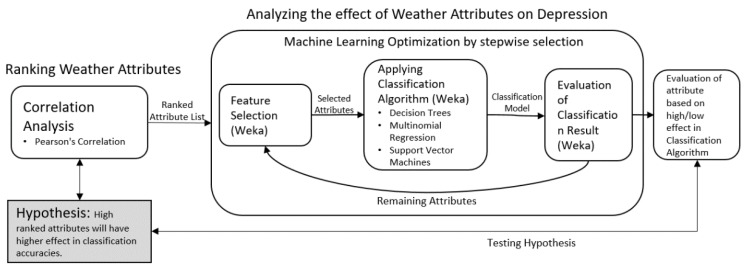

## correlation matrix 
The first thing I like to do when analyzing my variables is visualizing it through a correlation matrix because it’s the fastest way to develop a general understanding of all of my variables. To review, correlation is a measurement that describes the relationship between two variables — if you want to learn more about it, you can check out my statistics cheat sheet here.) Thus, a correlation matrix is a table that shows the correlation coefficients between many variables. I used sns.heatmap() to plot a correlation matrix of all of the variables

https://terenceshin.medium.com/week-2-52-stats-cheat-sheet-ae38a2e5cdc6

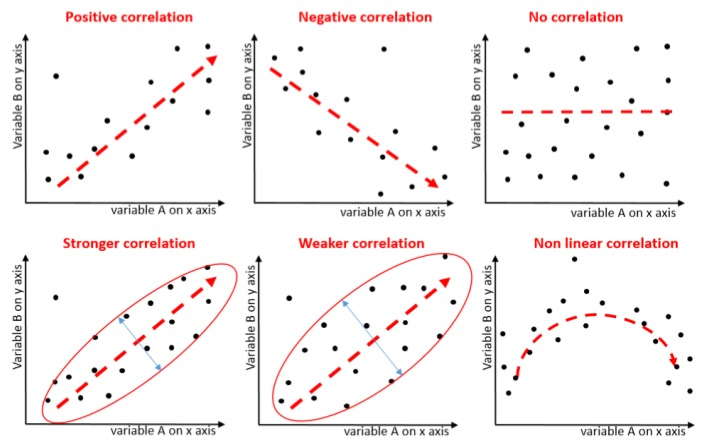

In [ ]:

corr = df.corr()# plot the heatmap
corheat=sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
corheat

### Correlation vs Chi-square test
Pearson’s correlation coefficient is used to illustrate the relationship between two continuous variables, such as years of education completed and income. The Chi-square test of Independence determines whether there is an association between two categorical variables i.e. whether the variables are independent or related like for example if education level and marital status are related for all people in some country.

## sns.pairplot()
is a great way to create scatterplots between all of your variables.

In [ ]:

pairs=sns.pairplot(df)
pairs

## Boxplot
Another way to visualize the distribution of a variable is a boxplot.
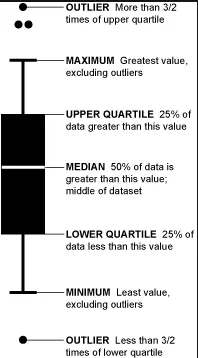

In [ ]:
dfnum=df.select_dtypes(['int64','float64'])
dfnum

In [ ]:
dften=sns.boxplot(df['tenure'])
dften       
    

## Pandas profiling

the Pandas package in Python is highly equipped to perform various kinds of EDA. Here, I will introduce the pandas profiling, which can effectively perform a comprehensive EDA within 3 lines of code within Jupyter Notebooks or JupyterLab.

! pip install pandas-profiling

import pandas_profiling 
import pandas as pd


x=ProfileReport(df)
x